In [335]:
%load_ext autoreload
%autoreload 2
from notebook import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<div class="namebox">    
Double Click to edit and enter your

1.  Jiaming Liu
2.  A17139097
3.  jil244@ucsd.edu
    
</div>

<div class="title">Lab 2: The Compiler</div>


This lab will give you a much clearer understanding of the role that the compiler plays in translating your source code into executables.  Our focus is on the optimizations that compilers perform and the critical role that they play in efficiently implementing modern compiled programming languages (e.g., C, C++, Rust, Go, and Java).  We will use C++, but many of the same lessons apply to other languages.

This lab includes a programming assignment.  You should start thinking about it early, so read that section now (or at least soon).

Check gradescope schedule for due date(s).

# FAQ and Updates

In [12]:
os.environ['PATH'] = "/cse142L/shim/bin:" + os.environ['PATH']


os.environ['LD_LIBRARY_PATH'] = "/cse142L/shim/lib:/cse142L/CSE141pp-Tool-Moneta/moneta/src:/cse142L/cse141pp-archlab/installed/lib:/usr/local/lib:" + os.environ['LD_LIBRARY_PATH']

* There are no updates, yet.

# Browser Compatibility

We are still working out some bugs in some browsers.  Here's the current status:

1.  Chrome -- well tested.  Preferred option.
2.  Firefox -- seems ok, but not thoroughly tested.
3.  Edge -- seems ok, but not thoroughly tested.
4.  Safari -- not supported at the moment.
5.  Internet Explorer -- not supported at the moment.

At the moment, the authentication step must be done in Chrome.  You usually _will not_ have to re-authenticate between labs, so if things work OK for the first, things will probably work here. 

# About Labs In This Class

_This section is the same in all the labs.  It's repeated here for your reference._

Labs are a way to **learn by doing**.  This means you _must_ **do**.  I have built these labs as Jupyter notebooks so that the "doing" is as easy and seamless as possible.

In this lab, what you'll do is answer questions about how a program will run and then compare what really happened to your predictions.  Engaging with this process is how you'll learn.  The questions that the lab asks are there for several purposes:

1.  To draw your attention to specific aspects of an experiment or of some results.
2.  To push you to engage with the material more deeply by thinking about it.
3.  To make you commit to a prediction so you can wonder why your prediction was wrong or be proud that you got it right.
4.  To provide some practice with skills/concepts you're learning in this course.
5.  To test your knowledge about what you've learned.

The questions are graded in one of three ways:

1. "Correctness" questions require you to answer the question and get the correct answer to get full credit.
2. "Completeness" questions require you to answer the question.
3. "Optional" questions are...optional.  They are there if you want to go further with the material.

Some of the "Completeness" problems include a solution that will be hidden until you click "Show Solution".  To get the most from them, try them on your own first.

Many of the "Completeness" questions ask you to make predictions about the outcome of an experiment and write down those predictions.  To maximize your learning, think carefully about your prediction and commit to it.  **You will never be penalized for making an incorrect prediction.**

You are free to discuss "Completeness" and "Optional" questions with your classmates.  You must complete "Correctness" questions on your own.

If you have questions about any kind of question, please ask during office hours or during class.

## How To Succeed On the Labs

Here are some simple tips that will help you do well on this lab:

1.  Read/skim through the entire lab _before_ class.  If something confuses you, you can ask about it.
2.  Start early.  Getting answers on edstem/piazza can take time.  So think through the lab questions (and your questions about them) carefully.
    1. Go through the lab once (several days before the deadline), do the parts that are easy/make sense
    2. Ask questions/think about the rest
    3. Come back and do the rest.
3.  Start early.  The DSMLP cluster gets busy and slow near deadlines.  "The cluster was slow the night of the deadline" is not an excuse for not getting the lab done and it is not justification for asking for an extension.
4.  Follow the guidelines below for asking answerable questions on edstem/piazza.

You may think to yourself: "If I start early enough to account for all that, I'd have to start right after the lab was assigned!"  Good thought!

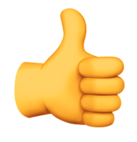


<div class="alert alert-block alert-danger">

**The Cluster Will Get Slow** DSMLP and our cloud machines will get crowded and slow _before every deadline_.  This is completely predictable.  DSMLP can also get crowded due to deadlines in other courses.  You need to start early so you can avoid/work around these slowdowns.  Unless there's some kind of complete outage, we will not grant extensions because the servers are crowded.
    
</div>

## Getting Help

You might run into trouble while doing this lab.  Here's how to get help:

1.  Re-read the instructions and make sure you've followed them.
2.  Try saving and reloading the notebook.
3.  If it says you are not authenticated, go to the [the login section of the lab](#Logging-In-To-the-Course-Tools) and (re)authenticate.
4.  If you get a `FileNotFoundError` make sure you've run all the code cells above your current point in the lab.
4.  If you get an exception or stack dump, check that you didn't accidentally modify the contents of one of the python cells.
5.  If all else fails, post a question to edstem/piazza.

## Posting Answerable Questions on Edstem/Piazza

If you want useful answers on edstem/piazza, you need to provide information that is specific enough for us to provide a useful answer.  Here's what we need:

1.  Which part of which lab are you working on (use the section numbers)?
2.  Which problem (copy and paste the _text_ of the question along with the number).

If it's question about instructions:

1.  Try to be as specific as you can about what is confusing or what you don't understand (e.g., "I'm not sure if I should do _X_ or _Y_.")

If it's a question about an error while running code, then we need:

1.  If you've committed anything, your github repo url.
2.  If you've submitted a job with `cse142` you _must_ provide the job id.  It looks like this: `544e0cf2-4771-43c3-86f8-1c30d7af601f`.  With the id, we can figure out just about anything about your job.  Without it, we know nothing.
3.  The _entire_ output you received.  There's no limit on how long an edstem/piazza post can be.  Give us all the information, not just the last few lines.  We like to scroll!

For all of the above **paste the text** into the edstem/piazza question.  Please **do not provide screen captures**.  The course staff refuses to type in job ids found in screen shots.


<div class="alert alert-block alert-danger">

**We Can't Answer Unanswerable Questions** If you don't follow these guidelines (especially about the github repo and the job id), we will probably not be able to answer your question on edstem/piazza.  We will archive it and ask you to re-post your question with the information we need.
    
</div>

## Keeping Your Lab Up-to-Date

Occasionally, there will be changes made to the base repository after the
assignment is released.  This may include bug fixes and updates to this document.  We'll post on piazza/edstem when an update is available.

In those cases, you can use the following commands to pull the changes from upstream and merge them into your code.  You'll need to do this at a shell.  It won't work properly in the notebook.  Save your notebook in the browser first.


```
cd <your directory for this lab>git remote add upstream $(cat .starter_repo)  # You need to do this once each time you checkout a new lab. It will fail 
                                              # harmlessly if you run it more than once.
cp Lab.ipynb Lab.backup.ipynb                 # Backup your work.
git commit -am "My progress so far."          # commit your work.
git pull upstream main --allow-unrelated-histories -X theirs # pull the updates
```

Or you can use the script we provide:

```
./pull-updates
```


Then, reload this page in your browser.

## How To Use This Document

You will use Jupyter Notebook to complete this lab.  You should be able to do much of this lab without leaving Jupyter Notebook.  The main exception will be some of the programming assignments.  The instructions will make it clear when you should use the terminal.

### Logging In

If you haven't already, you can go to [the login section of the lab](#Logging-In-To-the-Course-Tools) and follow the instructions to login into the course infrastructure.

### Running Code

Jupyter Notebooks are made up of "cells".  Some have Markdown-formatted text in them (like this one).  Some have Python code (like the one below).

For code cells, you press `shift-return` to execute the code.  Try it below:

In [7]:
print("I'm in python")

I'm in python


Code cells can also execute shell commands using the `!` operator.  Try it below:

In [8]:
!echo "I'm in a shell"

I'm in a shell


### Telling What The Notebook is Doing

The notebook will only run one cell at a time, so if you press `shift-return` several times, the cells will wait for one another.  You can tell that a cell is waiting if it there's a `*` in the `[]` to the left the cell:

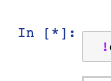


You'll can also tell _where_ the notebook is executing by looking at the table of contents on the left.  The section with the currently-executing cell will be red:

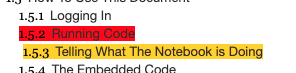

### What to Do Jupyter Notebook It Gets Stuck

First, check if it's actually stuck: Some of the cells take a while, but they will usually provide some visual sign of progress.  If _nothing_ is happening for more than 10 seconds, it's probably stuck.

To get it unstuck, you stop execution of the current cell with the "interrupt button":

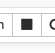

You can also restart the underlying python instance (i.e., the confusingly-named "kernel" which is not the same thing as the operating system kernel) with the restart button:

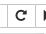

Once you do this, all the variables defined by earlier cells are gone, so you may get some errors.  You may need to re-run the cells in the current section to get things to work again.

You can also try reloading the web page.  That will leave Python kernel intact, but it can help with some problems.

### Common Errors and Non-Errors

1.  If you get `sh: 0: getcwd() failed: no such file or directory`, restart the kernel.
2.  If you get `INFO:MainThread:numexpr.utils:Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.`.  It's not a real error.  Ignore it. 
3.  If you get a prompt asking `Do you want to cancel them and run this job?` but you can't reply because you can't type into an output cell in Jupyter notebook, replace `cse142 job run` with `cse142 job run --force`. (see useful tip below.)
4.  If you get an `Error: Your request failed on the server: 500 Server Error: Internal Server Error for url=http://cse142l-dev.wl.r.appspot.com/file`, trying running the job again.
5.  Sometimes `cse142 job run` will just sit there and seemingly do nothing.  Weirdly, interrupting the kernel (button above) seems to jolt it awake and cause it to continue.
6.  If you get an error like this, stop your datahub server and restart it.

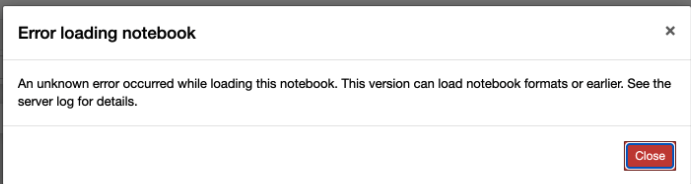

### Useful Tips

1.  If you need to edit a cell, but you can't you can unlock it by pressing this button in the tool bar (although you probably shouldn't do this because it might make the lab work incorrectly.  A better choice is to copy and paste the cell, _and then_ unlock the copy):
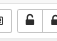

### The Embedded Code

The code embedded in the lab falls into two categories:

1.  Code you need to edit and understand.
2.  Code that you do not need to edit or understand -- it's just there to display something for you.

For code in the first category, the lab will make it clear that you need to study, modify, and/or run the code.  If we don't explicitly ask you to do something, you don't need to.

Most of the code in the second category is for drawing graphs.  You can just run it with shift-return to the see the results.  If you are curious, it's mostly written with `Pandas` and `matplotlib`. The code is all in `notebook.py`.   These cells should be un-editable.  However, if you want to experiment with them, you can copy _the contents_ of the cell into a new cell and do whatever you want (If you copy the cell, the copy will also be uneditable).

<div class="alert alert-block alert-info">

**Most Cells are Immutable** Many of the cells of this notebook are uneditable. The only ones you should edit are some of the code cells and the text cells with questions in them.
</div>

<div class="alert alert-block alert-info">

**Pro Tip** The "carrot" icon in the lower right (shown below) will open a scratch pad area.  It can be a useful place to do math (or whatever else you want.
    
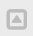
</div>

### Showing Your Work

Several questions ask you to show your work for calculations.  We don't need anything fancy.  Many of the questions ask you to compute something based on results of an experiment.  Your experimental results will be different than others', so your answer will be different as well.

To make it possible to grade your work (and give you partial credit), we need to know where your answer came from.  This why you need to show your work.  For instance this would be fine as answer to "On average, how many weeks do you have per lab?":

```
Weeks in quarter/# of labs = 5/5 = 1 weeks/lab
```

2 significant figures is sufficient in all cases, but you can include more, if you want.

If you are feeling fancy, you can use LaTex, but it's not at all required.

When it's appropriate, you can also paste in images.  However, Jupyter Notebook is flaky about it.  Save your notebook by clicking the disk icon:

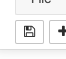

### Answering Questions

Throughout this document, you'll see some questions (like the one below).  You can double click on them to edit them and fill in your answer.  Try not to mess up the formatting (so it's easy for us to grade), but at least make sure your answer shows up clearly.  When you are done editing, you can `shift-return` to make it pretty again.

A few tips, pointers, and caveats for answering questions:

1. The answers are all in [github-flavored markdown](https://guides.github.com/features/mastering-markdown/) with some html sprinkled in.  Leave the html alone.
2. Many answers require you to fill in a table, and many of the `|` characters will be missing.  You'll need to add them back.
3. The HTML needs to start at the beginning of a line.  If there are spaces before a tag, it won't render properly.  If you accidentally add white space at the beginning of a line with an html tag on it, you'll need to fix it.
4. Text answers also need to start at the beginning of a line, otherwise they will be rendered as code.
5. Press `shift-return` or `option-return` to render the cell and make sure it looks good.
6. There needs to be a blank line between html tags and markdown.  Otherwise, the markdown formatting will not appear correctly.


You'll notice that there are three kinds of questions: "Correctness", "Completeness", and "Optional".  You need to provide an answer to the "Completeness" questions, but you won't be graded on its correctness.  You'll need to answer "Correctness" questions correctly to get credit.  The "Optional" questions are optional.

# Logging In To the Course Tools

    
In the course you will use some specialized tools to let you perform detailed measurements of program behavior.  To use them you need to login with your `@ucsd.edu` email address using the instructions below. **You need to use the email address that appears on the course roster.  That's the email address we created an account for.  In almost all cases, this is your `@ucsd.edu` email address.**

You'll do this periodically when you get an error about not being authenticated.  You can return to this notebook (or any other of the lab notebooks) to login at any time.

Here's what to do:

1.  Enter your `@ucsd.edu` email address in quotes after `login` below.  It'll take a few seconds to load.
2.  Click the google "G" login button below and login with your `@ucsd.edu` email address. 
3. **Click the google button regardless of whether it says "sign in" or "signed in".  Then be sure to select your `@ucsd.edu account` if it shows you multiple google acocunts**
4. You'll see a very long string numbers an letters appear above.  Click "Copy it" to copy it.

**Note:** If it doesn't give you a choice about which account to log into and authentication fails, that means you are logged into a single Google account and that account is _not_ your `@ucsd.edu` account.  You'll have to log into your `@ucsd.edu` through Gmail or through Chrome's account manager and then try again.

<div class="alert alert-block alert-danger">

**Use Chrome** The login process doesn't seem to work properly with Safari or Firefox.  Use Chrome to login.  You can use any of the other compatible browsers you want for the doing the rest of the lab, and it should be fine.

</div>



In [10]:
login("jil244@ucsd.edu") 


Next step:  Paste it below between the quote marks.  Press `shift-return`.

In [11]:
token("eyJhbGciOiJSUzI1NiIsImtpZCI6ImZkYTEwNjY0NTNkYzlkYzNkZDkzM2E0MWVhNTdkYTNlZjI0MmIwZjciLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJhY2NvdW50cy5nb29nbGUuY29tIiwiYXpwIjoiMjgwMzY3MjAzNDk1LWdzczA1cGtzN2o3MDExYmhhODl0YWg2NzRrbDVicDV1LmFwcHMuZ29vZ2xldXNlcmNvbnRlbnQuY29tIiwiYXVkIjoiMjgwMzY3MjAzNDk1LWdzczA1cGtzN2o3MDExYmhhODl0YWg2NzRrbDVicDV1LmFwcHMuZ29vZ2xldXNlcmNvbnRlbnQuY29tIiwic3ViIjoiMTE2MDI2MTEzMTI2Mjg0ODAxNjU5IiwiaGQiOiJ1Y3NkLmVkdSIsImVtYWlsIjoiamlsMjQ0QHVjc2QuZWR1IiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImF0X2hhc2giOiJoZ0pZcEI1ekNpMlVrc0xjVW16dVlnIiwibmFtZSI6IkppYW1pbmcgTGl1IiwicGljdHVyZSI6Imh0dHBzOi8vbGgzLmdvb2dsZXVzZXJjb250ZW50LmNvbS9hL0FJdGJ2bWx4NGJLRG55N2hyQ29FTkxuNE5XQnJkbmVQVU8yc1J3T1MyRjdkPXM5Ni1jIiwiZ2l2ZW5fbmFtZSI6IkppYW1pbmciLCJmYW1pbHlfbmFtZSI6IkxpdSIsImxvY2FsZSI6ImVuIiwiaWF0IjoxNjYwMDg5MzUyLCJleHAiOjE2NjAwOTI5NTIsImp0aSI6IjdiNGYxYjU2N2VmOWYxM2UwOTBhNjViY2VkNTljYzI3N2YwZjM4MDAifQ.xbfBWwGd7NkP53t0TQpMqvYmVLbUUTV4PhTyNnWDmdLV90xXPlXyUmzqtZaw18THjTcYFyCLeD59izhfSmOEURIdYeY8Kv31utxgWW8rhAExS_zuCkfVDLVpvMglnwwbtDrGs8X5vD81i6Mnc4L1WSObVeqmSlk86-bDcV-qS5nskL1NHVuOBmqIQjMIK7yv1cw0NFBHf31x1RSAPXktPHAjzJ5nyG8QcPSvPBF72Um_DkMjb7Tylm3bC-IFEoOVVQhvZGNCMv8tIOC__oNit-0iHE-I7KAVaEOTKNk1QgzPirL4BD90rpHLPcknd2iHAZXwAW_WoC2Q6BbZE3B1Xw")

You are authenticated as jil244@ucsd.edu



It should have replied with

``` 
You are authenticated as <your email>
```

You are now logged in!  Try submitting a job: 

In [12]:
!cse142 job run "echo Hello World"

You are submitting a job for lab "Lab 2: The Compiler" (compiler).
The due date for Lab 2: The Compiler has passed.  You can still submit, but you might want to submit for the current lab since the target docker image may be different, and things may not behave as described in the lab writeup.
Creating job adb13bbb-d556-4d61-af1e-2b9dbf198ce2 0.00 0.00
Ready for submission. 2.38 2.38
Job adb13bbb-d556-4d61-af1e-2b9dbf198ce2 is in state 'PUBLISHED'. 3.35 5.73. 
Job adb13bbb-d556-4d61-af1e-2b9dbf198ce2 is in state 'RUNNING'. 2.08 7.81. 
Job adb13bbb-d556-4d61-af1e-2b9dbf198ce2 is in state 'DONE_RUNNING'. 2.08 9.89.. 
Job adb13bbb-d556-4d61-af1e-2b9dbf198ce2 succeeded. 3.14 13.03Writing results 1.00 14.03
Hello World
Updated these files: 
Job Complete 0.46 14.49


If you see "Hello World", you're all set.  Proceed with the lab!

<div class="alert alert-block alert-danger">

Delete your token from the above cell. Because your token is esssentially your username and password combined, you should treat it like a password or ssh private key.  **Sharing your token with another student or posessing another student's token is an AI violation**.
</div>

# Grading

Your grade for this lab will be based on the following components.

| Part                       | value |
|----------------------------|-------|
| Jupyter Notebook           | 73%   |
| Programming Assignment     | 25%   |
| Post-lab survey.           | 2%    |

* No late work or extensions will be allowed.
* We will grade 5 of the "completeness" problems.  They are worth 3 points each.  We will grade all of the "correctness" questions.
* You'll follow the directions at the end of the lab to submit the lab write up and the programming assignment through gradescope. 
* Please check gradescope for exact due dates.

# A Note About The Examples

There are a bunch of short functions in the examples in the lab.  Their purpose is to illustrate the impact of different compiler optimizations in a clear way, and that is what I designed them for (often by trial and error).  As a result, none of them do anything _useful_.   Please don't expend effort trying to understand what the functions are doing or what they are for, there's nothing to find :-).

If you look closely, you'll also see that I compile some of the functions using complex sets of compiler flags.  I do this to highlight specific optimizations, but it's not usually helpful or necessary in the real world.
GCC and other compilers provide a [huge number of flags](https://gcc.gnu.org/onlinedocs/gcc/Optimize-Options.html) that control how the compiler optimizes.  Using these flags is _almost never necessary_ in the real world.  When you need to ship your code, just compile it with `-O3`.



# Common Errors

<div class="alert alert-block alert-danger">

**Known (but harmless) Bug** There's a known, intermittent bug in the CFG generation tool.  If you get this error:
    
```
^
Expected {'graph' | 'digraph'}  (at char 0), (line:1, col:1)
```
    
</div>

Just run the cell again (several times if needed), and it will eventually work.  We are working on this bug, but it's non-deterministic.

# New Tools

There are few new tools we will be using in this lab.

## Fiddles

This lab includes some "fiddles" that allow you to write C++ code and then analyze and/or run it.  Here's an example that runs the program then shows you the assembly for `main()` (give it a try, you can put whatever you want in the function.):

In [13]:

fiddle("hello_fiddle.cpp", function="main", run=False, code=r"""
#include<iostream>
int main(int argc, char * argv[]) {
    std::cout << "hello world!\n";
    return 0;
}
""").asm

Compiling your code...
rm -f build/hello_fiddle.s hello_fiddle.exe build/hello_fiddle.o

make build/hello_fiddle.s hello_fiddle.exe C_OPTS='' 
mkdir -p build/
cp hello_fiddle.cpp build/hello_fiddle.cpp 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/hello_fiddle.cpp -o build/hello_fiddle.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/hello_fiddle.cpp -o build/hello_fiddle.o
g++-8 build/hello_fiddle.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o hell

; build/hello_fiddle.s:15-34 (20 lines)
main:
.LFB1463:
	.cfi_startproc
	pushq	%rbp
	.cfi_def_cfa_offset 16
	.cfi_offset 6, -16
	movq	%rsp, %rbp
	.cfi_def_cfa_register 6
	subq	$16, %rsp
	movl	%edi, -4(%rbp)
	movq	%rsi, -16(%rbp)
	leaq	.LC0(%rip), %rsi
	movq	std::cout@GOTPCREL(%rip), %rax
	movq	%rax, %rdi
	call	std::basic_ostream<char, std::char_traits<char> >& std::operator<< <std::char_traits<char> >(std::basic_ostream<char, std::char_traits<char> >&, char const*)@PLT
	movl	$0, %eax
	leave
	.cfi_def_cfa 7, 8
	ret
	.cfi_endproc

## Control Flow Graphs

Control flow graphs (CFGs) are a common way to visually inspect the structure of _one function_ in a program.  

A CFG is a collection of nodes and edges.  Each node is a _basic blocks_ -- a sequence of instructions that always execute together.  This means that a basic block ends with either 1) a branch, 2) a jump, or 3) the target of a branch or jump.  The edges in the CFG are possible _control transfers_ between basic blocks.  So, the CFG shows all possible paths of control flow through the function.

Take a look at this code then run the cell to see it's CFG:

Compiling your code...
rm -f build/if_ex.s if_ex.exe build/if_ex.o

make build/if_ex.s if_ex.exe C_OPTS='' 
mkdir -p build/
cp if_ex.cpp build/if_ex.cpp 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/if_ex.cpp -o build/if_ex.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/if_ex.cpp -o build/if_ex.o
g++-8 build/if_ex.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o if_ex.exe

sym.if_ex
sym.if_ex


// if_ex.cpp:6-12 (7 lines)
uint64_t * if_ex(uint64_t * array,
		 unsigned long int size) {
	if (size == 0) {
		return NULL;
	}
	return array;
}

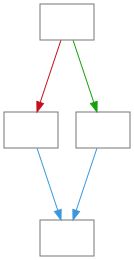

In [14]:
t = fiddle("if_ex.cpp", function="if_ex", run=False, remove_assembly=True, code=r"""
#include<cstdint>
#include<cstdlib>

extern "C" 
uint64_t * if_ex(uint64_t * array,
		 unsigned long int size) {
	if (size == 0) {
		return NULL;
	}
	return array;
}

int main() {
}
""")
display(t.source)
display(t.cfg)


The CFG shows that there are two paths through the function depending on the value of the `if` condition.  So there are two paths along which _control_ can _flow_.  The green and red lines correspond to the taken and not-taken outcomes of the branch at the end of the top block.

Here's a more complex piece of code (below the question).  Study it, answer the question, and then run the code cell below.

**Note:** Remember that you can paste images into a text cell while it's in edit mode.

<div class="question completeness">

<div class="question-text">
    
What do you think the CFG for the code below will look like (describe it briefly or use ASCII art or paste in screen capture)?</div>


<div class="answer">

```
    I think the CFG will looks like there are three path down to the final output because there are three different situation
ASCII art or text drawing/description of the CFG here.  
    
```
    
**How many paths through the code are there?**

 There are three paths

Or paste an image out here (outside the triple backticks).

</div>
</div>

Compiling your code...
rm -f build/if_else_if_else.s if_else_if_else.exe build/if_else_if_else.o

make build/if_else_if_else.s if_else_if_else.exe C_OPTS='' 
mkdir -p build/
cp if_else_if_else.cpp build/if_else_if_else.cpp 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/if_else_if_else.cpp -o build/if_else_if_else.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/if_else_if_else.cpp -o build/if_else_if_else.o
g++-8 build/if_else_if_else.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_op

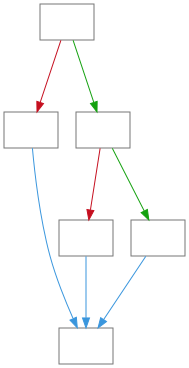

In [15]:
t = fiddle("if_else_if_else.cpp", function="if_else_if_else", remove_assembly=True, run=False, code=r"""
#include<cstdint>
#include<cstdlib>

extern "C" 
uint64_t * if_else_if_else(uint64_t * array,
			   unsigned long int size) {
	if (size/2) {
		return NULL;
	} else if (size/3) {
		return &array[size/3];
	} else {
		return array;
	}
}

int main() {
}
""")
display(t.cfg)

<div class="question correctness points-2">
    
<div class="question-text">

In the fiddle below, modify `foo()` so that its CFG looks like this (you can edit the code as many times as you'd like):

</div>

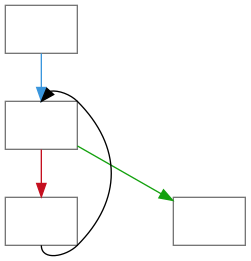

</div>

Compiling your code...
rm -f build/mimic_1.s mimic_1.exe build/mimic_1.o

make build/mimic_1.s mimic_1.exe C_OPTS='' 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/mimic_1.cpp -o build/mimic_1.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/mimic_1.cpp -o build/mimic_1.o
g++-8 build/mimic_1.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o mimic_1.exe

sym.foo
sym.foo


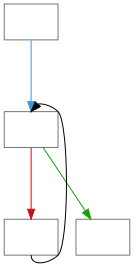

In [63]:
fiddle("mimic_1.cpp", "foo",code="""
extern "C"
int foo(int a);

int main(int argc, char * argv[]) {
    return foo(4);
}

extern "C" 
int foo(int a) {
    while( a > 2){
        a--;
    }
    return a;
}

""", remove_assembly=True, run=False).cfg

Finally, take a look at this code and the resulting CFG, and then answer the question below.  As you think about the question, look at the code and figure out what decision the program will need to make.  Each of these decisions maps to node with two out-going edges.  If you do that starting at the top of the loop, the role of each basic block should become clear.

In [34]:
t = fiddle("loop_if.cpp", function="loop_if", number_nodes=True, run=False, remove_assembly=True, code=r"""
#include<cstdint>
#include<cstdlib>

extern "C" 
uint64_t * loop_if(uint64_t * array,
		   unsigned long int size) {
	uint64_t* t= NULL;
	int k = 0;
	for(uint i = 0; i < size; i++) {
		if (i-size != 0) {
			k = 4;   //  L1
		} else if (i+size != 0) { // L2
			k = 5;
		}
	}
	return t + k; // L3
	
}


int main() {
}
""")
compare([t.source, t.cfg])


Compiling your code...
rm -f build/loop_if.s loop_if.exe build/loop_if.o

make build/loop_if.s loop_if.exe C_OPTS='' 
mkdir -p build/
cp loop_if.cpp build/loop_if.cpp 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/loop_if.cpp -o build/loop_if.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/loop_if.cpp -o build/loop_if.o
g++-8 build/loop_if.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o loop_if.exe

sym.loop_if
sym.loop_if


<div class="question correctness points-3">
    
<div class="question-text">Fill out the table below to show which nodes in the CFG correspond to the labeled line in the source code:</div>
    
<div class="answer">

| Line | Node | 
|------|------|
| L1   |   n3   
| L2   |   n5
| L3   |   n7    
    
</div>
</div>

## Call Graphs

CFGs shows the control flow _within a single function_ , but they cannot tell us much about the flow of control through an entire program.  To understand how functions call one another, we will use _call graphs_.

In a call graph, the nodes are functions, and an edge exists from one function to another, if the first function calls the second.

We will build call graphs by running the program and keeping track of which function calls occur.  We'll use the `gprof` profiler to collect the data, which means that building a call graph is a three stop process:

1.  Compile the program with `gprof` enabled.
2.  Run the program on a representative input.
3.  Generate the call graph for that execution of the program.

Here's an example:

<div class="question completeness">

<div class="question-text">
    
What do you think the call graph for the code below will look like (describe it briefly or use ASCII art or paste in screen capture)?</div>

<div class="answer">
    

```
I think it will looks like a triangle, because one can go to two or three, two can only to to three, and three will return the answer
    
```
Or paste an image out here (outside the triple backticks).

</div>
</div>

Compiling your code...
rm -f build/cg1.s cg1.exe build/cg1.o

make build/cg1.s cg1.exe C_OPTS='' GPROF=yes
g++-8 -S -c -Wall -Werror -g -pg   -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/cg1.cpp -o build/cg1.s
gcc-8 -c -Wall -Werror -g -pg   -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/cg1.cpp -o build/cg1.o
g++-8 build/cg1.o   -pg -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o cg1.exe

Running your code...
./cg1.exe

gprof cg1.exe | gprof2dot -n0 -e0 -z one | dot -Tpng -o cg1.exe.call_graph.png

sym.one
sym.one

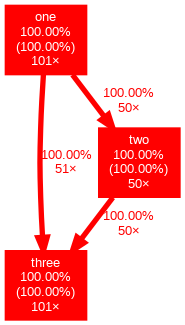

In [65]:

fiddle("cg1.cpp", gprof=True, function="one", code="""
extern "C" {
int one(int a);
int two(int a);
int three(int a);

int main(int argc, char * argv[]) {
    for(int i = 0; i < 100; i++) one(i);
    return one(4);
}

int one(int a) {
    if (a & 1)
        return two(a);
    else
        return three(a);
}

int two(int a) {
    return three(a);
}

int three(int a) {
    return a;
}
}
""", remove_assembly=True).call_graph


The call graph has a bunch of information in it regarding how many times each function was called and how often a function was called from one location rather than another, but for now, we'll just focus on which function called which.

<div class="question completeness">

<div class="question-text">Modify the fiddle above to add a loop to the call graph (but be sure the function still terminates).  Describe what you did below.</div>

<div class="answer">
fiddle("cg1.cpp", gprof=True, function="one", code="""
extern "C" {
int one(int a);
int two(int a);
int three(int a);

int main(int argc, char * argv[]) {
    for(int i = 0; i < 100; i++) {
           one(i);
           """, remove_assembly=True, run=False).cfg
    }
    return one(4);
}

int one(int a) {
    if (a & 1)
        return two(a);
    else
        return three(a);
}

int two(int a) {
    return three(a);
}

int three(int a) {
    return a;
}
}
""", remove_assembly=True).call_graph
                           
I add a line """, remove_assembly=True, run=False).cfg into the for loop in main function
    
</div>
<div>
   

Call graphs can reveal the internal workings of libraries.  For instance, take a look at the function below and answer this question:

<div class="question completeness">

<div class="question-text">

How deep do you think the call graph is (i.e., how long is the longest chain of one function calling another, calling another, etc.)?  How many different functions do you think are invoked? How many function calls are made in the course of running the program?  (It's OK if you have no concrete way to answer this.  But think about code you've written and what you think reasonable values might be.)
    
</div>
    
<div class="answer">

1. How deep is the graph?: total 9 layer

2. How many different functions are called?: two different function will be called
    
3. How many function calls are made? 8 function calls

</div>

</div>


In [66]:
t = fiddle("fiddle_sort.cpp", gprof=True, function="one", opt="-O0", code="""
#include<algorithm>

extern "C" int one(int a);

int main(int argc, char * argv[]) {
    return one(4);
}
#define ARRAY_SIZE (16*1024)
extern "C"  int one(int a) {
    int * array = new int[ARRAY_SIZE];
    std::sort(array, &array[ARRAY_SIZE]);
    return array[a];
}

""", remove_assembly=False,  trim_addresses=True, trim_comments=True)

Compiling your code...
rm -f build/fiddle_sort.s fiddle_sort.exe build/fiddle_sort.o

make build/fiddle_sort.s fiddle_sort.exe C_OPTS='-O0' GPROF=yes
mkdir -p build/
cp fiddle_sort.cpp build/fiddle_sort.cpp 
g++-8 -S -c -Wall -Werror -g -pg   -fPIC -pthread    -O0 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/fiddle_sort.cpp -o build/fiddle_sort.s
gcc-8 -c -Wall -Werror -g -pg   -fPIC -pthread    -O0 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/fiddle_sort.cpp -o build/fiddle_sort.o
g++-8 build/fiddle_sort.o   -pg -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath 

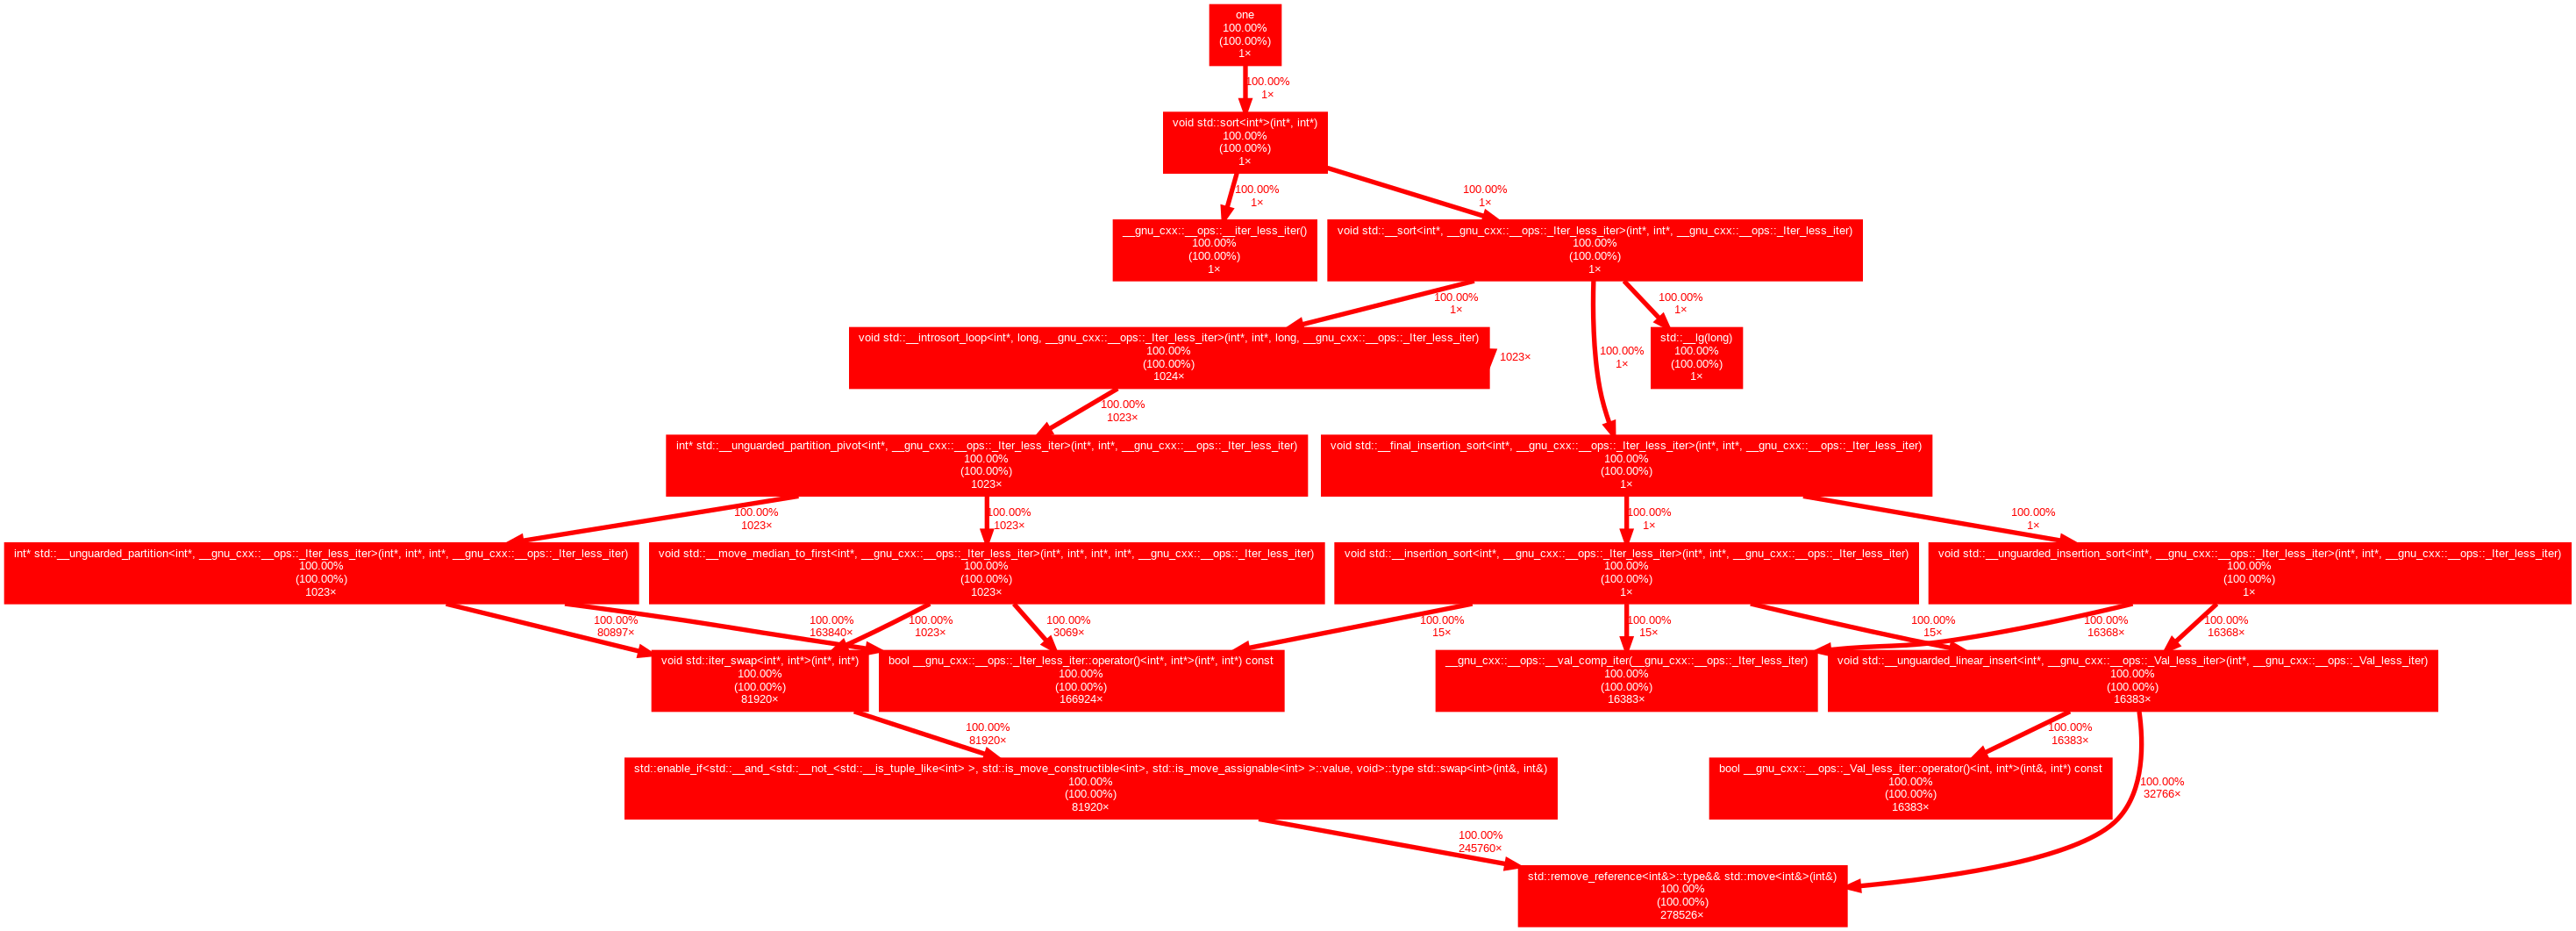

In [19]:
display(t.call_graph)

Wow, what a mess!  

You can double click on the image to zoom in and pan around.  You'll see lots of functions called many, many times, and each of those function calls requires a few extra instructions (e.g., to call the function and return from it.)

This seems shockingly inefficient.  Someone should really clean that up!

This kind of complex, deep call graph is very common in modern object-oriented programming languages.  

<div class="question optional">
<div class="question-text">
If you're curious, modify the fiddle to use other parts of the standard template library (STL).  For instance, you could create and initialize a `std::vector`  or an `std::list`.
</div>
<div class="answer">
What did you find?
</div>
</div>

## Looking At Assembly

CFGs and call graphs are good tools for looking at the high-level structure and behavior of programs, but we also need to understand what's going on at a finer level:  Inside the basic blocks.  To do that, we'll have to look at the assembly language that the compiler generates.

The lectures in 142 provided an overview of the x86 assembly and our main goal in both courses is that you be able to look at some x86 assembly and (with the help of google) get _some idea_ of what is going on.

<div class="alert alert-block alert-danger">

**Use the Slides, Luke! (and google!):** This lab doesn't contain everything you need to know about x86 assembly.  Please look back over the slides from 142 and relevant parts of the textbook for more details, especially about instruction suffixes and the register file.  Google is a good resource as well:  Searching for "x86 _inst name_ " will get your information about any instruction.
</div>

### The Basics

We'll start simple by revisiting the `if_ex()` function we saw earlier (run the cell):

Compiling your code...
rm -f build/if_ex.s if_ex.exe build/if_ex.o

make build/if_ex.s if_ex.exe C_OPTS='' 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/if_ex.cpp -o build/if_ex.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/if_ex.cpp -o build/if_ex.o
g++-8 build/if_ex.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o if_ex.exe

sym.if_ex
sym.if_ex


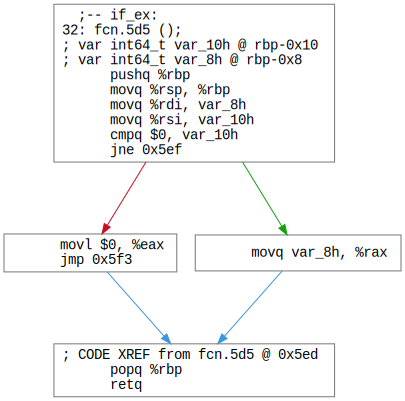

In [20]:
t = fiddle("if_ex.cpp", function="if_ex", run=False, code=r"""
#include<cstdint>
#include<cstdlib>

extern "C" 
uint64_t * if_ex(uint64_t * array,
		 unsigned long int size) {
	if (size == 0) {
		return NULL;
	}
	return array;
}

int main() {
}
""")
compare([t.source, t.asm])
display(t.cfg)

Take some time to study the source code (top left) and assembly output (top right) and how it corresponds to the CFG annotated with the assembly (bottom).

A few things to note:

1.  Comments in assembly start with `;`
2.  Things like `.L3:` that end in `:` are labels in the assembly and can be used as the "targets" of branches.  Some of them (e.g., `if_ex:`) mark the beginnings of functions.
3.  Other things like `.cfi_endproc` are assemble directives.  They provide metadata about the instruction, functions, and symbols.  They don't affect execution.  We will mostly ignore them.

Finally, note how the assembly in the CFG is different than the assembly from the compiler. 

The assembly on the right is the actual x86 assembly that the compiler generated.  The code in the CFG is equivalent, but it's not x86 assembly.  We'll call it _pseudo-assembly_.  It was generated by a _disassembler_ from the compiled binary.  There's a one-to-one correspondence between the assembly and the pseudo-assembly but there are some important differences:

1.  The targets from branch and jump instructions are raw addresses in the pseudo-assembly rather than labels.
2.  The pseudo-assembly provides some information about argument types in comments (e.g., `; var int64_t var_10h @ rbp-0x10`) and then uses `var_10h` in the pseudoassembly.  

Why does the CFG contain pseudo-assembly instead of the actual assembly? -- Because that's what the CFG drawing tool provides.  (As an aside, the tool we use to draw the CFGs is called [Redare2](https://rada.re/n/) and it's a really powerful reverse engineering tool.  It's really cool, but it has a really terrible interface).

You should also be able to spot the boundaries between the basic blocks in the assembly and see how the CFG makes them explicit.  You can see that the instruction at the start of each basic block is either

1. A branch target (I.e., a label that a branch might jump to), or
2. The instruction right after a branch.

The last instruction in each basic block is either:

1.  The instruction before a branch target (i.e.,  label), or
2.  A branch, jump, or return instruction.

If the last instruction in the block is a branch, then there will be two lines leaving the block -- one green, one red.  The green line is path control will take if the branch is _taken_.  The red line is the branch's _not taken_ path.  Notice how the red (not-taken) path leads to the block that contains `movl $0, %eax` which sets the return value for the function to 0.  This corresponds to the if condition `size == 0` being true.  The compiler is free to use any branch it wants to implement an if condition.  Is this case, it used `jne` (jump on not equal), but it could have used `je` (jump on equal) and reversed the position of the two basic blocks in the assembly.


<div class="question completeness">

<div class="question-text"> 
    
How does the variable `size` appear in the assembly and the pseudo-assembly?  That is, how can we tell that an instruction is operating on the value stored in `size`?
</div>
    
<div class="answer">

1. What does `size` look like in x86 assembly:  86 bits
2. What does `size` look like in pseudo-assembly: 32  bits
3. That is, how can we tell that an instruction is operating on the value store in `size`?  
    Store in different register which has different size
    
</div>    
</div>    

### A More Complex Example

Here's the assembly for `loop_if()`.  Run the cell.

Compiling your code...
rm -f build/loop_if.s loop_if.exe build/loop_if.o

make build/loop_if.s loop_if.exe C_OPTS='' 
mkdir -p build/
cp loop_if.cpp build/loop_if.cpp 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/loop_if.cpp -o build/loop_if.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/loop_if.cpp -o build/loop_if.o
g++-8 build/loop_if.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o loop_if.exe

sym.loop_if
sym.loop_if


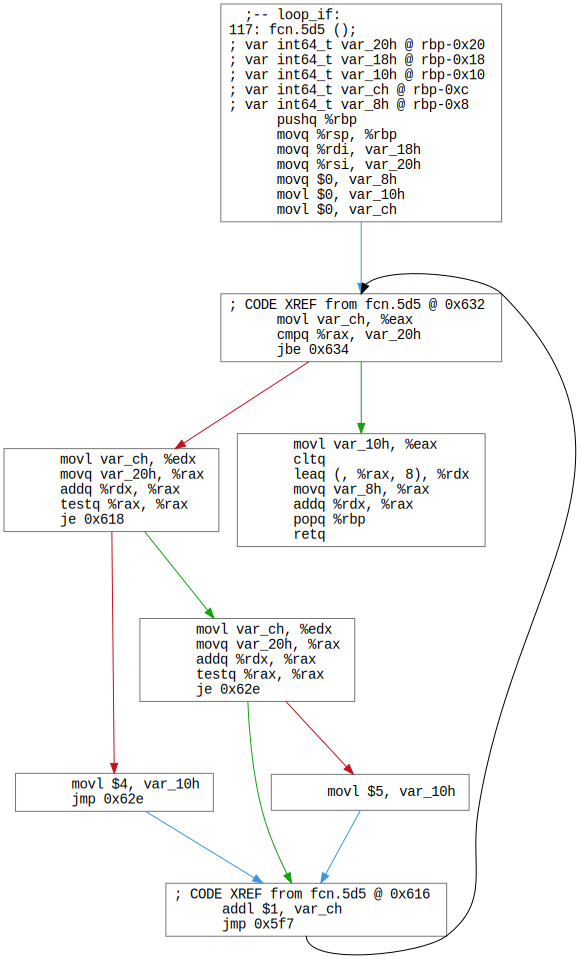

In [67]:
t = fiddle("loop_if.cpp", function="loop_if", run=False, code=r"""
#include<cstdint>
#include<cstdlib>

extern "C" 
uint64_t * loop_if(uint64_t * array,
		   unsigned long int size) {
	uint64_t* t= NULL;
	int k = 0;
	for(uint i = 0; i < size; i++) {
		if (i  + size != 0) { //  L1
			k = 4; 
		} else if (i+size != 0) { // L2
			k = 5;
		}
	}
	return t + k; // L3
	
}


int main() {
}
""")
compare([t.source, t.asm])
display(t.cfg)

<div class="question correctness points-2">

<div class="question-text">

What instruction implements these parts of the `loop_if()` (just copy and paste it from the assembly and don't be afraid to google.)?

</div>
        
<div class="answer">

|    |  Instruction|
|------|------|
| The add on line `L1` |  addq	%rdx, %rax  
| The comparison to zero on line `L2` | testq	%rax, %rax
    
</div>    
</div>    

### Counting Instructions With the CFG

In the next section you will study how compiler optimizations change which instructions execute.  Let's see what we can learn about which instructions execute by looking at the assembly.

Compiling your code...
rm -f build/loop_func.s loop_func.exe build/loop_func.o

make build/loop_func.s loop_func.exe C_OPTS='' 
mkdir -p build/
cp loop_func.cpp build/loop_func.cpp 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/loop_func.cpp -o build/loop_func.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/loop_func.cpp -o build/loop_func.o
g++-8 build/loop_func.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o loop_func.exe

sym.loop_func
sym.loop_fu

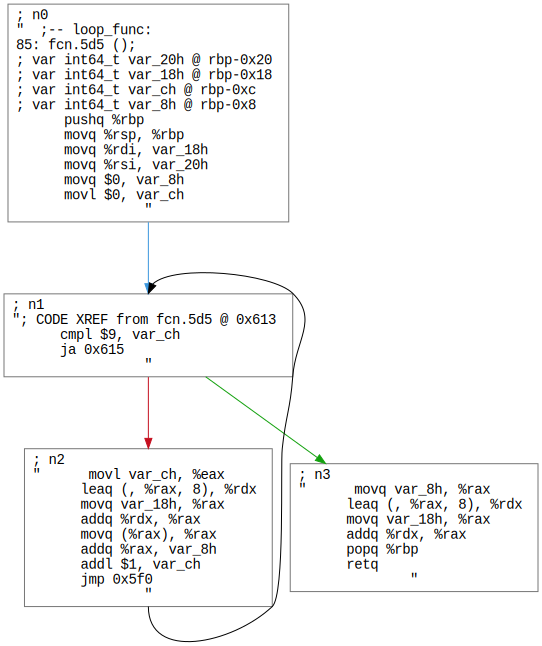

In [68]:
t = fiddle("loop_func.cpp", function="loop_func", number_nodes=True, run=False, code=r"""
#include<cstdint>
#include<cstdlib>

extern "C" 
uint64_t * loop_func(uint64_t * array,
		      unsigned long int size) {

	uint64_t s = 0;
	for(uint i = 0; i < 10; i++) {
		s += array[i];
	}
	return &array[s];
	
}


int main() {
}
""")
compare([t.source, t.asm])
display(t.cfg)

We are primarily interested in two things:

1.  How many instructions execute _in total_ (that's just `IC` from the performance equation).
2.  How many instructions access memory.

Counting instructions is simple:  You can count up the number of instructions in each basic block and multiply it by the number of times the basic block executes.

Determining which instructions access memory is also pretty simple except for one wrinkle.

The basic rules are that:

1.  In x86 assembly, if the instruction uses an addressing mode with parentheses (e.g., `-8(%rbp)` or `(%rax)`) then it accesses memory.
2.  In pseudo-assembly, operands like `[var_8h]` or `[rax*8]` are _also_ memory accesses.
3.  `push` and `pop` instructions are memory accesses.

The exception is the `lea` family of instructions (`leaq`, `leal`, etc.). These are "load effective address" and they just compute the address and store the _address_ into into the destination register.  So when you count memory accesses you should ignore `lea*` instructions.

Simple, right!  :-)

For this question, recall that "dynamic instructions" is the number of instructions that the processor executes and "static instructions" is the number of instructions the compiler generates.

<div class="question completeness">

<div class="question-text">
    
Fill in the table below to compute how many total instructions and how many memory accesses occur when `loop_func()` executes (Hint:  It is not necessary to trace through exactly what each instruction does.  Instead think about how control will flow through the CFG and just count how many times each block must execute.  Also don't be afraid to google the instruction names.).
    </div>
    
<div class="answer">

| basic block | # of times the block executes | static instruction count | static memory instruction count |  dynamic instruction count | dynamic memory instruction count | 
|-------------|-----------------|-------------------|--------------------------|-------------------|--------------------------|
| n0          |  1|4|4|6|1
| n1          |   10|0|0|2|0
| n2          |   9|0|2|8|0
| n3          |  1| 0|1|6|1
|                 |                ||   **Total**    |22|2
    
</div>

# The Perils of C++

C++ is a big, complex mess of a language that includes a bunch of powerful tools that make it possible to write fast code without too much pain.  However, all that power translates into a lot of complexity that shows up in the assembly code generated for C++ programs.  
In order to read C++ assembly output, you need to understand a few details about one aspect of this implementation process: linking.

## What Is Linking?

Linking is the final step in compiling a program.  Non-trivial programs are spread across multiple source files that are compiled one-at-a-time into _object files_ (`.o`) that contain binary instructions and static data (e.g., string constants from your code).  Each function and global variable in the object file has a name called a _symbol_.  We say that the object file _defines_ the symbols it contains.  For instance, if `foo.cpp` contains the source code for a function `bar()` then, `foo.o` will define the symbol `bar`.

The code in the object files will also _reference_ symbols defined in other object files.  For instance, if another file, `baz.cpp`, calls `bar`, then `baz.o` will have reference to `bar`.  Prior to linking, that reference is _undefined_.

The linker takes all the `.o` files and copies their contents into a single executable file.  As it copies them it _resolves_ the undefined references.  In 
this example, the linker resolves the undefined reference in `bar.o`  by replacing the reference with pointer to the code for `bar()` in  `foo.o`.

One important thing about linkers is that they are language-agnostic -- the linker will happy link object file generated from C++, C, Go, or Rust as long as the symbols match.

There's a lot more to [linking](https://www.amazon.com/Linkers-Kaufmann-Software-Engineering-Programming/dp/1558604960), but this is enough to see what's problematic about C++.

## C++ Name Mangling

The linker restricts what strings can serve as valid symbols: Symbols must start with a letter (or `_`) and only contain letters, numbers, and `_`.

For C, this poses no problems. If you declare a function `bar` in file `foo.c`:

``` c++
int bar(int a) {
    return 1;
}
```

The compiler will generate exactly one symbol with the name `bar`.   Then you can call it from another file `baz.c`:

```  c++
main() {
     bar(4);
} 
```

and the linker will know what function you mean (i.e., the function named `bar` from `foo.c`).

However, C++ allows function overloading, so we might have this in `foo.cpp`:

``` c++
int bar(int a) {
}

float bar(float a) {
}

```

This will generate two functions, so they need two symbols.  But what symbols should the compiler choose?  The compiler needs a systematic way of naming functions _that includes their type information_.  This will ensure that when we have `baz.cpp` with

``` c++
main() {
    bar(4);
    bar(4.0);
} 
```

The linker will know that we mean to call two different functions.

Things get more complex with templates, since we could have:

``` c++
int bar(const std::map<std::string, std::vector<int>> & a) {
}
```

That's a lot of information to pack into one symbol!

The solution that C++ compilers have adopted is called _name mangling_.  Name mangling is a deterministic, standardized way to convert _any_  function type and type into a unique symbol.

Let's see what it does.  Run the fiddle and answer the question:

In [7]:

fiddle("mangle.cpp", function="", demangle=False, code="""
#include<map>
#include<vector>
#include<string>
int foo(int a) {
    return 0;
}

float foo(float a) {
    return 0;
}

int foo(const std::map<std::string, std::vector<int>> & a) {
    return 0;
}

int main(){}
""").asm

Compiling your code...
rm -f build/mangle.s mangle.exe build/mangle.o

make build/mangle.s mangle.exe C_OPTS='' 
mkdir -p build/
cp mangle.cpp build/mangle.cpp 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/mangle.cpp -o build/mangle.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/mangle.cpp -o build/mangle.o
g++-8 build/mangle.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o mangle.exe

Running your code...
./mangle.exe

gprof mangle.exe | gprof2dot 

; build/mangle.s:1-90 (90 lines)
	.file	"mangle.cpp"
	.text
	.section	.rodata
	.type	_ZStL19piecewise_construct, @object
	.size	_ZStL19piecewise_construct, 1
_ZStL19piecewise_construct:
	.zero	1
	.type	_ZStL13allocator_arg, @object
	.size	_ZStL13allocator_arg, 1
_ZStL13allocator_arg:
	.zero	1
	.type	_ZStL6ignore, @object
	.size	_ZStL6ignore, 1
_ZStL6ignore:
	.zero	1
	.text
	.globl	_Z3fooi
	.type	_Z3fooi, @function
_Z3fooi:
.LFB1841:
	.cfi_startproc
	pushq	%rbp
	.cfi_def_cfa_offset 16
	.cfi_offset 6, -16
	movq	%rsp, %rbp
	.cfi_def_cfa_register 6
	movl	%edi, -4(%rbp)
	movl	$0, %eax
	popq	%rbp
	.cfi_def_cfa 7, 8
	ret
	.cfi_endproc
.LFE1841:
	.size	_Z3fooi, .-_Z3fooi
	.globl	_Z3foof
	.type	_Z3foof, @function
_Z3foof:
.LFB1842:
	.cfi_startproc
	pushq	%rbp
	.cfi_def_cfa_offset 16
	.cfi_offset 6, -16
	movq	%rsp, %rbp
	.cfi_def_cfa_register 6
	movss	%xmm0, -4(%rbp)
	pxor	%xmm0, %xmm0
	popq	%rbp
	.cfi_def_cfa 7, 8
	ret
	.cfi_endproc
.LFE1842:
	.size	_Z3foof, .-_Z3foof
	.globl	_Z3fooRKSt3mapINSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEESt6vectorIiSaIiEESt4lessIS5_ESaISt4pairIKS5_S8_EEE
	.type	_Z3fooRKSt3mapINSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEESt6vectorIiSaIiEESt4lessIS5_ESaISt4pairIKS5_S8_EEE, @function
_Z3fooRKSt3mapINSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEESt6vectorIiSaIiEESt4lessIS5_ESaISt4pairIKS5_S8_EEE:
.LFB1843:
	.cfi_startproc
	pushq	%rbp
	.cfi_def_cfa_offset 16
	.cfi_offset 6, -16
	movq	%rsp, %rbp
	.cfi_def_cfa_register 6
	movq	%rdi, -8(%rbp)
	movl	$0, %eax
	popq	%rbp
	.cfi_def_cfa 7, 8
	ret
	.cfi_endproc
.LFE1843:
	.size	_Z3fooRKSt3mapINSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEESt6vectorIiSaIiEESt4lessIS5_ESaISt4pairIKS5_S8_EEE, .-_Z3fooRKSt3mapINSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEESt6vectorIiSaIiEESt4lessIS5_ESaISt4pairIKS5_S8_EEE
	.globl	main
	.type	main, @function
main:
.LFB1844:
	.cfi_startproc
	pushq	%rbp
	.cfi_def_cfa_offset 16
	.cfi_offset 6, -16
	movq	%rsp, %rbp
	.cfi_def_cfa_register 6
	movl	$0, %eax
	popq	%rbp
	.cfi_def_cfa 7, 8
	ret
	.cfi_endproc
.LFE1844:
	.size	main, .-main
	.ident	"GCC: (Ubuntu 8.4.0-1ubuntu1~18.04) 8.4.0"
	.section	.note.GNU-stack,"",@progbits

<div class="question completeness">

<div class="question-text"> What's the mangled name for each of these functions?</div>
    
<div class="answer">
    
| function | mangled name |
|----------|--------------|
| `int foo(int a)` | _Z3fooi| 
| `float foo(float a)` | _Z3foof | 
| `int foo(const std::map<std::string, std::vector<int>> & a)`| _Z3fooRKSt3mapINSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEESt6vectorIiSaIiEESt4lessIS5_ESaISt4pairIKS5_S8_EEE|

    
</div>

</div>

As you can see, mangled names make assembly pretty hard to read. To make matters worse, mangled names show up in other places as well (e.g.,  the output of profiling tools).

Fortunately, C++ compilers usually come with a utility to de-mangle names.  For `g++` it's called `c++filt` and it takes in text, looks for mangled names and demangles them.  For instance:

In [8]:
!echo _Z3foof | c++filt
!echo _Z3fooRKSt3mapINSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEESt6vectorIiSaIiEESt4lessIS5_ESaISt4pairIKS5_S8_EEE | c++filt

foo(float)
foo(std::map<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::vector<int, std::allocator<int> >, std::less<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > >, std::allocator<std::pair<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > const, std::vector<int, std::allocator<int> > > > > const&)


You'll notice that the full name for `int foo(const std::map<std::string, std::vector<int>> & a)` is very long.  This is because it includes full type names (including the C++ namespace) and all the default template parameters.

To see how it works on assembly, change `demangle=False` in the fiddle above to `demangle=True` and re-run it.  The resulting assembly is no longer valid code (since the symbol names are invalid), but it's much easier to read.

From now on in the examples, the assembly code in the examples will be demangled, but you will probably run into some mangled names occasionally.  Just remember to use `c++filt` to clean them up.

## C vs C++ Linkage

The way that the compiler generate symbols for a function is called the function's _linkage_.  We've seen two kinds:  C linkage which just uses the function name  and C++ linkage which uses mangled names.

You might have noticed that some of the code examples have `extern "C"` before some functions.  This is a way of telling the compiler that it should use C linkage for those functions (i.e., just use the function names).  You can use it for one function:

``` c++
extern "C" int foo()
```

or a group of functions:

``` c++
extern "C" {
    int foo(){}
    int bar(){}
}
```

This is useful if you want to call the function from a language other than C++ (e.g., C).  We will use it in the examples, because it makes it easier to refer to the functions.


# Optimization

Now, we have all the tools we need to study how  compiler optimizations affect program performance.  In the exercises below, we'll look at some of the most important optimizations that compilers perform and why and how they work.  

We have several goals:

1.  To provide some intuition about what the compiler can and cannot do, so you can predict when it will need your help and when you should trust it to "do the right thing".
2.  To see how and why optimization is so important for languages like C++.
3.  To gain further insight into how a computation is implemented affects its performance (via the performance equation).

## Register assignment

The first and simplest optimization is _register assignment_.  Register assignment takes local variables and intermediate values and stores them in register rather than on the static.  This saves `mov` instructions and memory accesses.  You can see it in action below:

In [9]:

unopt = fiddle("reg_assign.cpp", function="foo", run=False, code="""

extern "C" int foo(int a, int b){
    return a * b;
}

int main(){
    return foo(1, 0);
}
""")
opt = fiddle("reg_assign.cpp", function="foo", run=False, opt="-O1")
display(unopt.source)
compare([unopt.asm, opt.asm], ["Unoptimized", "Optimized (-O1)"])

Compiling your code...
rm -f build/reg_assign.s reg_assign.exe build/reg_assign.o

make build/reg_assign.s reg_assign.exe C_OPTS='' 
mkdir -p build/
cp reg_assign.cpp build/reg_assign.cpp 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/reg_assign.cpp -o build/reg_assign.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/reg_assign.cpp -o build/reg_assign.o
g++-8 build/reg_assign.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o reg_assign.exe

sym.foo
sym.

// reg_assign.cpp:3-5 (3 lines)
extern "C" int foo(int a, int b){
    return a * b;
}

The code on the left is unoptimized.  The code on the left is optimized.

Wow!  The optimized code is much shorter!

A few things to notice about the code and to remember about x86 assembly:

First, the "base pointer" is in `%rbp`.  This is the base of the stack frame for this function call.  Local variables typically live on the stack and are accessed relative to the base pointer.

Second, in x86, the first two function arguments are passed in `%edi` and `%esi`.  Return values are stored in `%eax`.

Third, in unoptimized code, `a` and `b` are on the stack at locations `-4(%rbp)` and `-8(%rbp)`, respectively.  In fact, the compiler goes through the trouble of storing `%edi` and `%esi` into `-4(%rbp)` and `-8(%rbp)`.  

Then it, _immediately_ uses `movl` to load `a` back into the `%eax` before the `imull` instruction loads `b` from the stack, multiplies it by `%eax`, storing the result in `%eax`. 

The optimized code avoids all that nonsense with the stack.  It just copies `%edi` into `%eax`, and multiplies it by `%esi`, once again leaving the result in `%eax`.

<div class="alert alert-block alert-info">

**Pro Tip: Identifying unoptimized assembly** Register assignment is one of the most basic optimizations that compilers preform and the difference between the optimized and unoptimized versions is starkly obvious.  This means that you can usually just tell by looking at assembly code whether it was compiled with optimizations enabled: if it has lots of parentheses (on instructions other than `lea`) it's probably not optimized.
</div>

<div class="question correctness points-2">

<div class="question-text">
    
Assuming constant `CPI` and `CT` (i.e., they are the same for the optimized and unoptimized code) how much speedup did register assignment provide for `foo()` (show your work)?
    
</div>
 
<div class="answer">
    
For the unoptimized code, there are 5 IC need to run, which is 1.pushq	%rbp, 2.movq	%rsp, %rbp 3.imull	-8(%rbp), %eaxm  4.popq	%rbp 5.ret , but for the optimized code, it will run 3 IC in total. Approximatly 1.67 speed up. Other than that is all about memory access
    
</div>

    
</div>

You can also encourage the compiler to put a variable into a register with the `register` keyword.  This is not a good practice in real code since modern compilers do register assignment automatically.  We'll use this trick in some of our examples to highlight the impact of individual optimizations.  

<div class="question completeness">
    

<div class="question-text">

Go ahead and try it on the fiddle above by writing `register int a` in the argument list for `foo()`.  What changed?
</div>
    
<div class="answer">
    
The memory access will become faster
    
</div>
    
</div>

## Common sub-expression elimination

A _common sub-expression_ is a piece of repeated computation in a program.  Since calculating the same thing twice is a waste of time, the compiler will eliminate the second instance and reuse the result of the first.  Here's an example:

In [26]:

unopt = fiddle("CSE.cpp", function="foo", run=False, code="""

extern "C" int foo(register int a, register int b){
   register int c = a * b;
   return a * b + c;
}

int main(){
    return foo(1, 0);
}
""")
opt = fiddle("CSE.cpp", function="foo", run=False, opt="-O1")
display(unopt.source)
compare([unopt.asm, opt.asm], ["Unoptimized", "Optimized (-O1)"])

Compiling your code...
rm -f build/CSE.s CSE.exe build/CSE.o

make build/CSE.s CSE.exe C_OPTS='' 
mkdir -p build/
cp CSE.cpp build/CSE.cpp 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/CSE.cpp -o build/CSE.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/CSE.cpp -o build/CSE.o
g++-8 build/CSE.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o CSE.exe

sym.foo
sym.foo
Compiling your code...
rm -f build/CSE.s CSE.exe build/CSE.o

make build/CSE.s CSE.exe 

// CSE.cpp:3-6 (4 lines)
extern "C" int foo(register int a, register int b){
   register int c = a * b;
   return a * b + c;
}

Again, the unoptimized code does some inefficient things.  I encourage you to trace through the assignments/`movl`s (`a` is in `%edi` and `b` is in `%esi`), but the key thing is that it performs two `imull` instructions that compute the same result.

The optimized code, just computes the product once and stores it in `%edi`.  Then it use `leal` to add `%rdi` to itself. and store the result in `%eax`.  

<div class="alert alert-block alert-info">

**Pro Tip; `lea` in action** Recall that `leal` computes the effective address of it's first argument and stores that address in its second argument.  In this case, it uses the `(r1,r2)` addressing mode which adds `r1` and `r2` together to compute the effective address.  Using `leal` in this way is a very common idiom in x86 assembly, because most x86 instructions overwrite one argument.  `lea`, however, does not.
    
</div>

<div class="question completeness">

<div class="question-text">
    
Play around with the fiddle above and see how complex of a sub-expression you can get the compiler to eliminate.
    
</div>
    

    
</div>

It's useful to know what common sub-expressions the compiler can eliminate because it lets you write more natural code.  Consider these two (equivalent) code snippets:

```
if (k < array[len - 1] ) {
   k = array[len - 1];
}
```
and 

```

int a = array[len - 1];
if (k < a ) {
   k = a;
}
```

In the second, the programmer has effectively performed common sub-expression elimination explicitly leading to longer and (I would argue) less readable code.  

A programmer without the benefit of CSE142L might think the longer code is faster, but the savvy alumnus of this class will know they can rely on the compiler to eliminate the extra work automatically.

## Loop invariant code motion

_Loop invariant code motion_ identifies computations in the body of a loop that don't change from one iteration to the next.  The compiler can _hoist_ that code out of the loop, saving instructions.  For example:

In [13]:
unopt = fiddle("LICM.cpp", function="foo", run=False, trim_addresses=True, code="""

extern "C" int foo(register int a, register int b){
    register int c = 0;
    for(register int i = 0; i < a; i++) {
        c += b*a;
    }
    return c;
}

int main(){
    return foo(1, 0);
}
""")
opt = fiddle("LICM.cpp", function="foo", run=False, trim_addresses=True, opt="-O1")
display(unopt.source)
compare([unopt.asm, opt.asm], ["Unoptimized", "Optimized (-O1)"])
compare([unopt.cfg, opt.cfg], ["Unoptimized", "Optimized (-O1)"])

Compiling your code...
rm -f build/LICM.s LICM.exe build/LICM.o

make build/LICM.s LICM.exe C_OPTS='' 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/LICM.cpp -o build/LICM.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/LICM.cpp -o build/LICM.o
g++-8 build/LICM.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o LICM.exe

sym.foo
sym.foo
Compiling your code...
rm -f build/LICM.s LICM.exe build/LICM.o

make build/LICM.s LICM.exe C_OPTS='-O1' 
g++-8 -S -c 

// LICM.cpp:3-9 (7 lines)
extern "C" int foo(register int a, register int b){
    register int c = 0;
    for(register int i = 0; i < a; i++) {
        c += b*a;
    }
    return c;
}

Quite a bit changes when we turn on optimizations, but the key thing to notice is that the unoptimized code has an `imull` in the loop body while the optimized code does not.  In the optimized code, the `imull` has been moved into a new basic block called a _loop header_.

## Strength reduction

In _strength reduction_ the compiler converts a "stronger" (i.e., more general and/or slower) operation into a "weaker" (i.e. less general and/or faster) operation.  The most common example is converting multiplication and division by powers of two into left and right shifts.

For example:

In [11]:

unopt = fiddle("SR.cpp", function="foo", run=False, trim_addresses=True, code="""
extern "C" int foo(register unsigned int a, register unsigned int b){
    return a *8;
}

int main(){
    return foo(1, 0);
}
""")
opt = fiddle("SR.cpp", function="foo", run=False, trim_addresses=True, opt="-O1")
display(unopt.source)
compare([unopt.asm, opt.asm], ["Unoptimized", "Optimized (-O1)"])

Compiling your code...
rm -f build/SR.s SR.exe build/SR.o

make build/SR.s SR.exe C_OPTS='' 
mkdir -p build/
cp SR.cpp build/SR.cpp 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/SR.cpp -o build/SR.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/SR.cpp -o build/SR.o
g++-8 build/SR.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o SR.exe

sym.foo
sym.foo
Compiling your code...
rm -f build/SR.s SR.exe build/SR.o

make build/SR.s SR.exe C_OPTS='-O1' 
g++-

// SR.cpp:2-4 (3 lines)
extern "C" int foo(register unsigned int a, register unsigned int b){
    return a *8;
}

We don't even need to look at the optimized code to find strength reduction.  Strength reduction is such a common optimization that the compiler does it even when we tell it not to optimize.  Note that there is no `mull` instruction, but there is a shift arithmetic left long (`sall`) instruction with a constant `$3` that multiplies `%eax` by 8.

The optimized code does one better and folds the whole function in one `leal`.  The `n(,%r,k)` addressing mode multiplies register `%r` times `k` and adds it to `n`.  `k` must be power of two, which means that the processor can use a left shift to implement it.

<div class="question completeness">

<div class="question-text">

Modify the fiddle above so that the `0` in the `leal`s first argument becomes a 4.
    
</div>
unopt = fiddle("SR.cpp", function="foo", run=False, trim_addresses=True, code="""
extern "C" int foo(register unsigned int a, register unsigned int b){
    return 4+a *8;
}

int main(){
    return foo(1, 0);
}
""")
opt = fiddle("SR.cpp", function="foo", run=False, trim_addresses=True, opt="-O1")
display(unopt.source)
compare([unopt.asm, opt.asm], ["Unoptimized", "Optimized (-O1)"])

</div>

Changing multiplies and divides in to shifts is not the only kind of strength reduction that is possible.  In the fiddle below change the `a*8` to the expressions given in the question below and see what the compiler does:

In [29]:

unopt = fiddle("SR2.cpp", function="foo", run=False, trim_addresses=True, code="""
extern "C" int foo(register unsigned int a, register unsigned int b){
    return a*3;
}
int main(){
    return foo(1, 0);
}
""")
opt = fiddle("SR2.cpp", function="foo", run=False, trim_addresses=True, opt="-O1")
display(unopt.source)
compare([unopt.asm, opt.asm], ["Unoptimized", "Optimized (-O1)"])

Compiling your code...
rm -f build/SR2.s SR2.exe build/SR2.o

make build/SR2.s SR2.exe C_OPTS='' 
mkdir -p build/
cp SR2.cpp build/SR2.cpp 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/SR2.cpp -o build/SR2.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/SR2.cpp -o build/SR2.o
g++-8 build/SR2.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o SR2.exe

sym.foo
sym.foo
Compiling your code...
rm -f build/SR2.s SR2.exe build/SR2.o

make build/SR2.s SR2.exe 

// SR2.cpp:2-4 (3 lines)
extern "C" int foo(register unsigned int a, register unsigned int b){
    return a*3;
}

<div class="question completeness">

<div class="question-text"> 
    
Try replacing `a*8` with each of the following.  Describe what the compiler does:
    
</div>

<div class="answer">

|        | What the compiler did | 
|--------|-----------------------|
| `a*3`   | complier will do leal	(%rdi,%rdi,2), %eax |  
| `a*5`| complier will do leal	(%rdi,%rdi,4), %eax |
| `a*11`| complier will use leal twice  |
| `a/b`|complier will do divl	%esi  |
| `a/3`| complier will do shrl	%eax|

</div>
    
<div class="question-text"> 
    
Optional:  Find an expression for which the compiler has to do something significantly different.
    
</div>

</div>

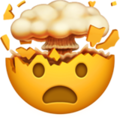

## Constant propagation

_Constant propagation_ allows the compiler to identify the value of constant expressions at compile time and use those constant values to simplify computations.  This effectively executes part of the program _at compile time_ and embeds the result in the assembly.

For example:

In [21]:
unopt = fiddle("CP.cpp", function="foo", run=False, trim_addresses=True, code="""

extern "C" int foo(register int a, register int b){
    register int c = 4;
    register int d = 4;
    return a + c + d;
}

int main(){
    return foo(1, 0);
}
""")
opt = fiddle("CP.cpp", function="foo", run=False, trim_addresses=True, opt="-O1 -fno-inline")
display(unopt.source)
compare([unopt.asm, opt.asm], ["Unoptimized", "Optimized (-O1)"])

Compiling your code...
rm -f build/CP.s CP.exe build/CP.o

make build/CP.s CP.exe C_OPTS='' 
mkdir -p build/
cp CP.cpp build/CP.cpp 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/CP.cpp -o build/CP.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/CP.cpp -o build/CP.o
g++-8 build/CP.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o CP.exe

sym.foo
sym.foo
Compiling your code...
rm -f build/CP.s CP.exe build/CP.o

make build/CP.s CP.exe C_OPTS='-O1 -fno-i

// CP.cpp:3-7 (5 lines)
extern "C" int foo(register int a, register int b){
    register int c = 4;
    register int d = 4;
    return a + c + d;
}

Again, the compiler is doing multiple things at once, but the constant propagation is visible:  In the unoptimized code, it moves `$4` into both `%r12d` and `%ebx` and then adds both those register to `%eax` on the next two lines.  In the optimized code it's folded both `4`s into the `8` in the `leal` instruction.  Here, `leal` is using the `n(%r)` addressing mode which adds a constant `n` to `%r`.  In this case, that enough to implement the entire function.

So what happened to variables `c` and `d`?  They are gone!

The compiler can make bigger things disappear:

In [22]:

unopt = fiddle("CP2.cpp", function="foo", run=False, trim_addresses=True, code="""

extern "C" int foo(register int a, register int b){
    register int i, s = 0;
    for(i = 0; i < 10; i++) {
        s+= i;
    }
    return s;
}

int main(){
    return foo(1, 0);
}
""")
opt = fiddle("CP2.cpp", function="foo", run=False, trim_addresses=True, opt="-O1 -fno-inline")
display(unopt.source)
compare([unopt.asm, opt.asm], ["Unoptimized", "Optimized (-O1)"])

Compiling your code...
rm -f build/CP2.s CP2.exe build/CP2.o

make build/CP2.s CP2.exe C_OPTS='' 
mkdir -p build/
cp CP2.cpp build/CP2.cpp 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/CP2.cpp -o build/CP2.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/CP2.cpp -o build/CP2.o
g++-8 build/CP2.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o CP2.exe

sym.foo
sym.foo
Compiling your code...
rm -f build/CP2.s CP2.exe build/CP2.o

make build/CP2.s CP2.exe 

// CP2.cpp:3-9 (7 lines)
extern "C" int foo(register int a, register int b){
    register int i, s = 0;
    for(i = 0; i < 10; i++) {
        s+= i;
    }
    return s;
}

Since the compiler can evaluate the whole loop at compile time, it does.
Bye, bye loop!  

![Bye bye](https://media3.giphy.com/media/SABGACIrfegQ4O1Aey/200w.webp?cid=ecf05e47aa8u3emxknrkw6fv3rpkesce1x1nog5t1hjpoang&rid=200w.webp&ct=g)

<div class="question optional">
    
<div class="question-text">
   
Play around with the fiddle to test the limits of constant propagation.  Can you write code that could be evaluated at compile time but the compiler can't do it?  What constructs does the compiler have trouble with when it comes to constant propagation?

</div>

</div>    
    

## Loop Unrolling

The example above also demonstrates _loop unrolling_.  In loop unrolling, the compiler "unrolls" a loop so that the loop body contains the computation for multiple iterations of the loop.  For instance:

In [35]:


unopt = fiddle("unroll1.cpp", function="foo", run=False, trim_addresses=True, number_nodes=True, opt="-O0", code="""

extern "C" int foo(register unsigned int a, register unsigned int b){
    register unsigned int i, s = 0;
    for(i = 0; i < b*8; i++) {
        s+= i;
    }
    return s;
}

int main(int argc, char *argv[]){
    return foo(1, 4);
}
""")
opt = fiddle("unroll1.cpp", function="foo", run=False, number_nodes=True, trim_addresses=True, opt="-O1 -funroll-loops")
display(unopt.source)
compare([unopt.cfg, opt.cfg], ["Optimized but not unrolled", "Unrolled"])

Compiling your code...
rm -f build/unroll1.s unroll1.exe build/unroll1.o

make build/unroll1.s unroll1.exe C_OPTS='-O0' 
mkdir -p build/
cp unroll1.cpp build/unroll1.cpp 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread    -O0 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/unroll1.cpp -o build/unroll1.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread    -O0 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/unroll1.cpp -o build/unroll1.o
g++-8 build/unroll1.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o unroll1.exe

sym.foo
sym.foo
Compiling your code...
rm 

// unroll1.cpp:3-9 (7 lines)
extern "C" int foo(register unsigned int a, register unsigned int b){
    register unsigned int i, s = 0;
    for(i = 0; i < b*8; i++) {
        s+= i;
    }
    return s;
}

On the left, the loop body is unoptimized blocks `n1` and `n2`.  They get merged and replicated into optimized blocks `n1` and `n2` (on the right).

<div class="question correctness points-3">

<div class="question-text">
    
If `b` is 4 and CPI remains constant (i.e., change in speedup is due just to change in `IC`)
    , how much speedup would you expect from unrolling the loop (Show your work)?</div>
    
<div class="answer">
    

    On the right, there are 18 instruction in the for loop, the left side has 7 instruction. Since b =4, the for loop will run 4*8 which is 32 times on the right, 32*7 = 224 times, but for the
    Unrolled part, the for loop no longer exist, it will just run through the 18 line, approximately 12.5 times faster



</div>
    

</div>

The example above is simplified since the loop bound is `8*b`.  From experience, I know that gcc likes to unroll loops 8 times, so this makes the number of iterations work out nicely.  Replace the loop bound with `b` and try running it again.

<div class="question completeness">

<div class="question-text">

After you replaced `8*b` with `b`, why did the compiler add the additional basic blocks that appeared in the optimized CFG?  For an (optional) challenge, explain how they work.</div>
    
    
<div class="answer">
    because b may not power of 2
  

</div>
</div>

While, in principle, a compiler could unroll any loop, it will refuse to unroll some loops because they are too complicated:

Compiling your code...
rm -f build/unroll-not.s unroll-not.exe build/unroll-not.o

make build/unroll-not.s unroll-not.exe C_OPTS='-O1 -funroll-loops' 
mkdir -p build/
cp unroll-not.cpp build/unroll-not.cpp 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread    -O1 -funroll-loops -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/unroll-not.cpp -o build/unroll-not.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread    -O1 -funroll-loops -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/unroll-not.cpp -o build/unroll-not.o
g++-8 build/unroll-not.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options 

// unroll-not.cpp:3-24 (22 lines)
extern "C" int foo(register unsigned int a, register unsigned int b){
    register unsigned int i, s = 0;

    i = 10000; // LOOP A
    while(i > 0) {
        i -= b;
        s+=i;
    }


    i = 8;     // LOOP B
    while(i > 0) {
        i -= b;
        s += i;
        if (i == 3)
            continue;
        //if (i == 2)
            //break;
    }

    return s;
}

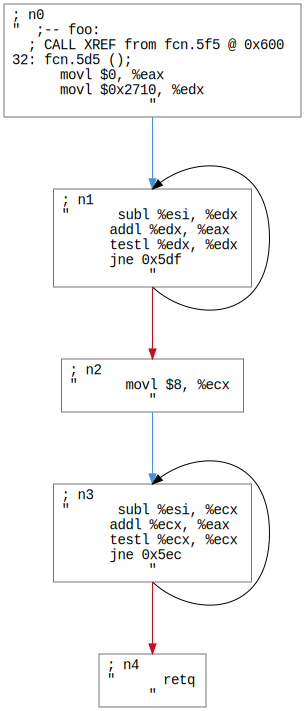

In [38]:

opt = fiddle("unroll-not.cpp", function="foo", run=False, trim_addresses=True, number_nodes=True, opt="-O1 -funroll-loops", code="""

extern "C" int foo(register unsigned int a, register unsigned int b){
    register unsigned int i, s = 0;

    i = 10000; // LOOP A
    while(i > 0) {
        i -= b;
        s+=i;
    }


    i = 8;     // LOOP B
    while(i > 0) {
        i -= b;
        s += i;
        if (i == 3)
            continue;
        //if (i == 2)
            //break;
    }

    return s;
}

int main(int argc, char *argv[]){
    return foo(1, argc);
}
""")
display(opt.source)
display(opt.cfg)

<div class="question completeness">

<div class="question-text">

Simplify both of the loops above so that the compiler will unroll them.  You can change the computation that the loop performs, but try to alter the loop as little as possible.  What characteristics or parts of the loop are preventing the compiler from unrolling the loop?
    
</div>
    break;
</div>

## Combining Single-function Optimizations

Each of these optimizations is interesting in isolation, but they are more powerful together.

Consider this code.  I've used a macro `DIV` to make it clearer where division occurs.  This code uses division in several different ways.  Study it, and, assuming `size = 30`, calculate how many divides the program will execute?

Run the cell and let's see what the compiler does:

In [39]:
unopt = fiddle("CP.cpp", function="div_loop", run=False, number_nodes=True, trim_addresses=True, code="""
#include<cstdint>
#include<cstdlib>
extern "C" uint32_t div_loop(uint64_t * array,
        unsigned long int size) {
#define X 3
#define Y 8
#define DIV(a,b) (a / b)

    for(uint32_t i = 0; i < DIV(size, 3); i++) {
        array[DIV(i, 2) +  DIV(Y, X)] = DIV(size, 3);
    }
    return array[0];
}

int main(){

    return div_loop(NULL, 12);
}
""")
opt = fiddle("CP.cpp", function="div_loop", run=False, number_nodes=True, trim_addresses=True, opt="-O1 -fno-inline")
display(unopt.source)
compare([unopt.cfg, opt.cfg], ["Unoptimized", "Optimized (-O1)"])

Compiling your code...
rm -f build/CP.s CP.exe build/CP.o

make build/CP.s CP.exe C_OPTS='' 
mkdir -p build/
cp CP.cpp build/CP.cpp 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/CP.cpp -o build/CP.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/CP.cpp -o build/CP.o
g++-8 build/CP.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o CP.exe

sym.div_loop
sym.div_loop
Compiling your code...
rm -f build/CP.s CP.exe build/CP.o

make build/CP.s CP.exe C_OPTS='

// CP.cpp:4-14 (11 lines)
extern "C" uint32_t div_loop(uint64_t * array,
        unsigned long int size) {
#define X 3
#define Y 8
#define DIV(a,b) (a / b)

    for(uint32_t i = 0; i < DIV(size, 3); i++) {
        array[DIV(i, 2) +  DIV(Y, X)] = DIV(size, 3);
    }
    return array[0];
}

To start, how many divides (i.e., instructions with `div` in their names) are there? -- zero!

Something strange is going on.  How is the compiler dividing (hint:  it's the weirdest looking thing in this code) Even if you don't know how _exactly_ it's dividing, can you tell _how many times_ its dividing?

<div class="question completeness">

<div class="question-text">

For each `DIV()` in the code above, list the optimizations that the compiler applied to the code and the combined effect they had.  (hint: the optimizations we've discussed are sufficient)
    
</div>
    
<div class="answer">
    
|              | optimizations | effect |
|--------------|---------------|--------|
|DIV(size,3)  |  Loop unrolling| loop gone
|  DIV(8/3)   |  constant propagation | compile time
|  DIV(i,2)   | strength reduction | twice faster
    
</div>
</div>

<div class="solution">
    
`DIV(size,3)`:  If you go looking for this divide in the unoptimized code, you won't find it:  The compiler uses strength reduction to convert division by a constant into multiplication by the inverse of that constant.  Or, to think about it another way, `size/3` becomes `size * 1/3`, is just algebra.  
    
In the unoptimized code, the compiler does dutifully execute it twice, however:  The `1/3` comes from the `movabsq` instruction in unoptimized blocks `n1` and `n2`. That huge immediate value is binary for `1/3`.
    
In the optimized code, the compiler recognizes that `DIV(size,3)` is loop-invariant and a common sub-expression, so all the instances of it get moved into block `n0`, where it executes just once at the beginning, rather than twice in each iteration.
    
`DIV(8/3)`:  This expression is a constant (`8/3 = 2` in integer math), so the compiler computes the value and stores it as the constant in the first `addl` in block `n2` of the unoptimized code.  Is the optimized code, it's the `2` in `2(%rcx)` in block `n2`.
    
`DIV(i/2)`:  Here, again, strength reduction happens even without optimizations turned on: This divide becomes `shrl` in unoptimized block `n2`. It's the same thing in the optimized version.

So, in total, the optimizer removed or optimized away everything by a single shift in the loop body.  You can also see that it removed a bunch of other instructions too.  For fun, you could figure out why the rest of them are not necessary.  
    
</div>

## Function Inlining

So far, all the optimizations have only affected a single function and none of them will have any impact on the call graph of our program.  This means they cannot hope to fix those monstrous call graphs that we got from invoking relatively simple STL functions.  Function _inlining_ will change all that.

### Function Call Overhead 

Before we get to inlining, let's talk a little about functions.  When you a write a function, the code you write turns into the "body" of the function.  However, the processor has to do some work to _make_ the function call and each function includes some overhead instructions in addition to instructions for code the function contains.  For example, consider this code:

In [35]:
fiddle("prologue.cpp", function="", run=False, opt="-Og", code="""

long int sum(long int a, long int b) {
    return a + b;
}

int main(){
    return sum(1,2);
}
""").asm


Compiling your code...
rm -f build/prologue.s prologue.exe build/prologue.o

make build/prologue.s prologue.exe C_OPTS='-Og' 
mkdir -p build/
cp prologue.cpp build/prologue.cpp 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread    -Og -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/prologue.cpp -o build/prologue.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread    -Og -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/prologue.cpp -o build/prologue.o
g++-8 build/prologue.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o prologue.exe



; build/prologue.s:1-31 (31 lines)
	.file	"prologue.cpp"
	.text
	.globl	sum(long, long)
	.type	sum(long, long), @function
sum(long, long):
.LFB0:
	.cfi_startproc
	leaq	(%rdi,%rsi), %rax
	ret
	.cfi_endproc
.LFE0:
	.size	sum(long, long), .-sum(long, long)
	.globl	main
	.type	main, @function
main:
.LFB1:
	.cfi_startproc
	subq	$8, %rsp
	.cfi_def_cfa_offset 16
	movl	$2, %esi
	movl	$1, %edi
	call	sum(long, long)@PLT
	addq	$8, %rsp
	.cfi_def_cfa_offset 8
	ret
	.cfi_endproc
.LFE1:
	.size	main, .-main
	.ident	"GCC: (Ubuntu 8.4.0-1ubuntu1~18.04) 8.4.0"
	.section	.note.GNU-stack,"",@progbits

<div class="sidebar">
    <div class="title">The Application Binary Interface (ABI)</div>    

There are several standardized protocols for how arguments are passed to functions and even how names are mangled.  These protocols are called "application binary interfaces" or ABIs.  It's important that the caller (the function that calls) and the callee (the function that is called) agree on the ABI.   The ABI dictates which arguments go in which register and in what order, the number of bits in an `int` vs a `long int`, how things like pass-by-value vs. pass-by-references are implemented, and how C++ virtual function tables (which implement virtual functions) are laid out. Generally speaking, if two object files (i.e., `.o` files) were compiled with the same ABI, functions in one object file can call functions in another.  

For the most part, you can think of there being one ABI per operating system, but that's not completely accurate.  Linux has (at least) two: one for the kernel and one for user programs.  Microsoft has one.  Intel has defined a standard as well.  The [wikipedia page](https://en.wikipedia.org/wiki/Application_binary_interface) has a little more detail.
    
If you're curious, use the fiddle to see how the compiler passes, `struct`s, pointers to `struct`, and C++ references to `struct`s.  What's surprising about how it implements those three different language constructs?
    
</div>


The body of `sum` is very simple:  It should just be a single add instruction, but instead it has to return as well.   The _call site_ in `main` takes 3 instructions (the `ret` is part of the overhead for calling `main`, not `sum`).

In this case, the _function call overhead_ is four instructions: 1 x `ret`, 2 x `movl`, and 1 x `call`.

<div class="question optional">

<div class="question-text">

What happens to function call overhead if you add more arguments (something interesting happens past 8)?  What if pass a struct?   How does the complexity of _the caller_ affect function call overhead?
    
</div>
    
<div class="answer">
    
    
</div>
</div>



Recall the earlier example with `std::sort` and how many function calls were involved.  Each of them incurred this kind of overhead.  What a waste!

### Removing Function Call Overheads

One way to remove the function call overhead is to copy the body of the function (i.e., the useful part) to the caller.  Then, we don't need to pass arguments, make the `call`, or do the `ret`.
The compiler can do this automatically by _inlining_ the function.

For instance, the compiler can inline `foo` into `loop`:

In [36]:
loop_unopt = fiddle("inline1.cpp", function="main", run=False, remove_assembly=False, opt="-O0", code="""


extern "C" int inline __attribute__ ((used)) foo( register int a, register int b) { 
    return a + b;
}

int main(int argc, char * argv[]){
    register int i;
    register int s = 0;
    for(i = 0; i < argc; i++) {
        s += foo(i,i);
    }
    return s;
}
""")
loop_opt = fiddle("inline1.cpp", function="main", run=False, remove_assembly=False, opt="-O1")
foo_unopt = fiddle("inline1.cpp", function="foo", run=False, remove_assembly=False, opt="-O0 ")

compare([foo_unopt.source, foo_unopt.cfg], ["foo()", "No inlining"])
compare([loop_unopt.source, loop_unopt.cfg], ["loop()", "No inlining"])
compare([loop_opt.cfg], ["loop() with inlining"])


Compiling your code...
rm -f build/inline1.s inline1.exe build/inline1.o

make build/inline1.s inline1.exe C_OPTS='-O0' 
mkdir -p build/
cp inline1.cpp build/inline1.cpp 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread    -O0 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/inline1.cpp -o build/inline1.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread    -O0 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/inline1.cpp -o build/inline1.o
g++-8 build/inline1.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o inline1.exe

sym.main
sym.main
Compiling your code...
r

When the compiler is finished with `loop()` it contains all the code that was in `foo()`.  It also no longer contains a function call at all.

<div class="question completeness">

<div class="question-text">

Based on the change in instruction count (IC), how much speedup does inlining provide in this case? 
    
</div>
    
<div class="answer">
    3 times speed up
    
</div>
</div>

<div class="solution">
    
Without inlining, each trip through `for` loop takes 15 instructions (8 in `loop()` and 7 in `foo()`).  With inlining, it's 4.  
    
How big a difference this makes depends on the value of `argc`.  Let's assume it's large (like 100).  In this case the instructions before and after the loop contribute very little to `IC` and we can ignore them.   So the speedup (ignoring the first and last basic block) approximately 14/4 = 3.5x.
</div>

But this is just the beginning of inlining's power, because it also vastly increases the opportunities to apply other optimizations.  Consider `foo()` in the example above.  Without inlining, the compiler can only apply optimizations that will work for _all_ values of `a` and `b`.  However, once `foo()` is inlined, the compiler can optimize _that copy_ of `foo()` for the values of `a` and `b` at that call site.  Then it is free to apply all the other optimizations we've discussed already.

For instance:

In [37]:
caller_unopt = fiddle("inline2.cpp", function="caller", run=False, remove_assembly=False, opt="-Og", code="""

extern "C" inline int loop(register int a) { 
    register int i;
    register int sum = 0;
    for(i = 0; i < a; i++) {
        sum += i;
    }
    return sum;
}

extern "C" int caller(register int a) {
    return loop(20);
}

int main(){
    caller(1);
}
""")
caller_opt = fiddle("inline2.cpp", function="caller", run=False, remove_assembly=False, opt="-O3")
loop_unopt = fiddle("inline2.cpp", function="loop", run=False, remove_assembly=False, opt="-Og -fkeep-inline-functions")

compare([loop_unopt.source, loop_unopt.cfg], ["loop()", "No inlining"])
compare([caller_unopt.source, caller_unopt.cfg], ["caller()", "No inlining"])
compare([caller_opt.cfg], ["caller() with inlining"])


Compiling your code...
rm -f build/inline2.s inline2.exe build/inline2.o

make build/inline2.s inline2.exe C_OPTS='-Og' 
mkdir -p build/
cp inline2.cpp build/inline2.cpp 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread    -Og -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/inline2.cpp -o build/inline2.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread    -Og -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/inline2.cpp -o build/inline2.o
g++-8 build/inline2.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o inline2.exe

sym.caller
sym.caller
Compiling your code.

Bye bye, function call!  Bye Bye, loop!

![bye bye](https://media3.giphy.com/media/tuvMgAPzxaQBq/200.webp?cid=ecf05e47jb4f5ojpiqlpr9o2b5wdn980swe4q4pcbwxmbxcu&rid=200.webp&ct=g)


<div class='question completeness'>

<div class="question-text">

Which optimizations did the compiler apply to come up with inlined, optimized version of `caller()`?  For each optimization explain what it accomplished.
    
</div>
    
<div class='answer'>
Inlining-- foo(), costant propagation -- loop bound , loop unrolling -- constant bound.

</div>
</div>

<div class="solution">
The compiler applied:
    
1. Inlining -- It merged `foo()` into the loop.
2. constant propagation -- The loop bound becomes constant.
3. Loop unrolling -- It completely unrolled the loop because it has a constant loop bound.
4. constant prop -- It evaluated the unrolled loop at compile time.
</div>

# C++ Revisited

C++ is an amazing language and it places a large burden on the compiler which has to implement all its interesting features and make it go fast.  Below, let's look at how the optimizations you've explored can fix the messy call graph we saw earlier.  Then, we'll investigate the impact of virtual functions.

## Optimizations in C++

We now have all the tools we need to see how a compiler can handle the messiness of C++ and its standard library.  Here's the sort example from earlier with and without optimizations:

In [7]:
unopt = fiddle("sort_revisited.cpp", gprof=True, function="one", opt="-O0", code="""
#include<algorithm>
extern "C" int one(int a);

int main(int argc, char * argv[]) {
    return one(4);
}
#define ARRAY_SIZE (a*16*1024)
extern "C"  int one(int a) {
    int * array = new int[ARRAY_SIZE]; 
    std::sort(array, &array[ARRAY_SIZE]);
    return array[a];
}

""", remove_assembly=False,  trim_addresses=True, trim_comments=True)
opt = fiddle("sort_revisited.cpp", gprof=True, function="one", opt="-O1 -finline-functions", 
                 remove_assembly=False,  
                 trim_addresses=True, 
                 trim_comments=True)
compare([unopt.call_graph, unopt.cfg],["Unoptimized call graphs", "Unoptimized CFG for one()"])
compare([opt.call_graph, opt.cfg],["Optimized call graph", "Optimized CFG for one()"])

Compiling your code...
rm -f build/sort_revisited.s sort_revisited.exe build/sort_revisited.o

make build/sort_revisited.s sort_revisited.exe C_OPTS='-O0' GPROF=yes
mkdir -p build/
cp sort_revisited.cpp build/sort_revisited.cpp 
g++-8 -S -c -Wall -Werror -g -pg   -fPIC -pthread    -O0 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/sort_revisited.cpp -o build/sort_revisited.s
gcc-8 -c -Wall -Werror -g -pg   -fPIC -pthread    -O0 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/sort_revisited.cpp -o build/sort_revisited.o
g++-8 build/sort_revisited.o   -pg -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lb

What a difference some optimization can make!  A few things to note about the optimized code:

1. The call to `std::sort()` is gone.  It's been inlined into `one()`, which now calls several other functions (e.g., `std::__introsort_loop()` and `std::__unguarded_linear_insert()`.
2.  The CFG for `one()` is more complex because it contains parts of `std::sort`.
3.  The optimized call graph above is _much_ shallower, and there are vastly few function calls (you'll have to double click and zoom in to see that).  The call graph is probably missing some calls due to some limitations of `gprof` (there are a few other function calls in `one()`), but the situation is clearly much better.

There's a large impact on performance as well.  The cell below runs a very similar code to the fiddle above, and this cell takes a while...:

In [13]:
!make clean
!make sort.exe sort_O3.exe sort_Og.exe

rm -rf build/ .tmp
rm -rf *.gv *-gv.pdf *.pin-trace #*.csv 
rm -rf *.exe *.o *.i *.s *.out *.d *.gcda *.gcno *.gprof *.gcov *.csv.raw core	
rm -rf 
mkdir -p build/
cp sort.cpp build/sort.cpp 
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/sort.cpp -o build/sort.o
mkdir -p build/
cp main.cpp build/main.cpp 
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/main.cpp -o build/main.o
g++-8 build/sort.o build/main.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o sort.

In [14]:
!cse142 job run --take "sort*.exe" --take '*.cfg' './sort.exe    --function stl_sort --reps 1 --stats sort_0.csv  --MHz 3500 --size 10000000  --stat-set PE.cfg --tag optimization=-O0'
!cse142 job run --take "sort*.exe" --take '*.cfg' './sort_O3.exe --function stl_sort --reps 1 --stats sort_3.csv  --MHz 3500 --size 10000000  --stat-set PE.cfg --tag optimization=-O3'
!cse142 job run --take "sort*.exe" --take '*.cfg' './sort_Og.exe --function stl_sort --reps 1 --stats sort_g.csv  --MHz 3500 --size 10000000  --stat-set PE.cfg --tag optimization=-Og'

You are submitting a job for lab "Lab 2: The Compiler" (compiler).
The due date for Lab 2: The Compiler has passed.  You can still submit, but you might want to submit for the current lab since the target docker image may be different, and things may not behave as described in the lab writeup.
Creating job fd20edce-89de-4bec-adcf-3e6264dbff75 0.00 0.00
Ready for submission. 3.31 3.31
Job fd20edce-89de-4bec-adcf-3e6264dbff75 is in state 'PUBLISHED'. 1.65 4.96. 
Job fd20edce-89de-4bec-adcf-3e6264dbff75 is in state 'RUNNING'. 2.08 7.04.... 
Job fd20edce-89de-4bec-adcf-3e6264dbff75 is in state 'DONE_RUNNING'. 5.20 12.24... 
Job fd20edce-89de-4bec-adcf-3e6264dbff75 succeeded. 4.15 16.39Writing results 1.00 17.39
Loading PAPI engine.
Tracking PAPI_TOT_INS
Tracking PAPI_TOT_CYC
Running stl_sort
Updated these files: ./sort_0.csv
./sort_0.csv.raw
Job Complete 0.46 17.86
You are submitting a job for lab "Lab 2: The Compiler" (compiler).
The due date for Lab 2: The Compiler has passed.  You can s

In [16]:
df = render_csv("sort_0.csv").append(render_csv("sort_3.csv"))

optimization           IC       CPI            CT        ET
0          -O0  10703331573  0.990042  2.869136e-10  3.040350
0          -O3   1767228642  2.146794  2.870598e-10  1.089069

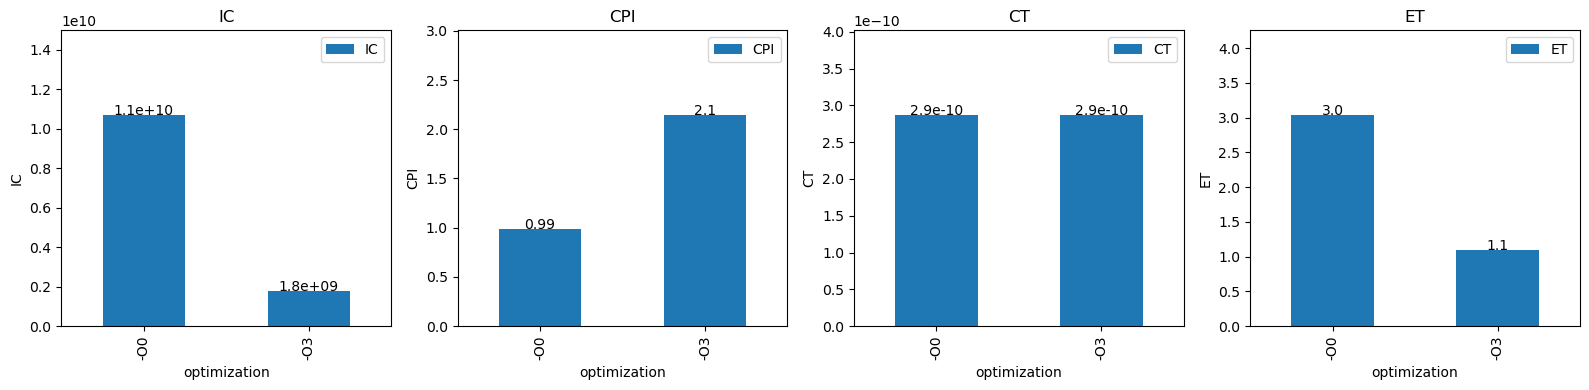

In [42]:
display(df[["optimization", "IC", "CPI", "CT","ET"]])
plotPEBar(df=df,
          what=[("optimization", "IC"),
                ("optimization", "CPI"),
                ("optimization", "CT"), 
                ("optimization", "ET")])

<div class="question correctness points-3">

<div class="question-text">
    
Based on the data above compute the speedup of `-O3` over `-O0` for `IC`, `CPI`, and `ET`.  
</div>
    
<div class="answer">

|            | speedup | 
|------------|---------|
| `IC`       | 6.05656298151
| `CPI`      | 0.46117233418
| `ET`       | 2.79169639389
    
</div>
    
</div>

That is why you should compile your C++ code with optimizations turned on.

## C++ Virtual Functions

C++ has a lot of fancy object-oriented features, and one of the most powerful is virtual functions.  However, an oft-cited downside of virtual functions is that they are more expensive than normal functions.  A [google search](https://www.google.com/search?q=C%2B%2B+virtual+function+call+overhead) for "C++ virtual function call overhead" produces an astonishing number of hits.   Let's see for our selves!

In the fiddle below, we have a class with a single, virtual function that we'll call in two different ways.  

In `static_call()` we allocate an instance of `A` as a local variable.  This let's the compiler know, for certain, that `a` is actually of type `a` and not a subclass of `A` that has overridden `foo()`.   As a result, when we invoke `a.foo()`, it is not a virtual call.  It's a "static" call.

In `virtual_call()`, we create an instance of `A` using `new` and store _a pointer to it_ in `a` which is of type `A*`.  Now, when we invoke `a->foo()`, all the compiler knows is that `a` points to an instance of `A` or a _subclass of_`A` that might have overridden `foo()`.  In this case, it has to make a "virtual" or "dynamic" call to `foo()`.  (It's worth note that it seems like the compiler could infer that `a` points to an instance of `A` instead of an instance of a subclass.  However, our compiler seems to not be that smart.)

Run the cell, and we'll look at the assembly.

In [43]:
optimizations = "-Og -fno-inline"
heading(f"Compiled with {optimizations}")
static_unopt = fiddle("virt.cpp", function="static_call", run=False, number_nodes=True, opt=optimizations,
                     code="""
#include<cstdint>
#include"function_map.hpp"


class A {
public:
    virtual void bar() {}
    virtual int foo(int x) {
        int s = 0;
        for(int i = 0; i < 10; i++) {
            s += x;
        }
        return s;
    }
};

#define START_C extern "C" { // this just hides the braces from the editor, so it won't try to indent everything.
#define END_C  }


START_C


int static_call(uint64_t * array,
		uint64_t  size) {
	A a;
	register int sum = 0;
	
	for(register uint64_t i = 0; i < size ; i++)
		sum += a.foo(4);

	return sum;
}

int virtual_call(uint64_t * array,
		 uint64_t  size) {
	register A * a = new A();
	register int sum = 0;
	
	for(register uint64_t i = 0; i < size ; i++)
		sum += a->foo(4);
	
	return sum;
}

END_C

#define METHOD_FUNC(n) FUNCTION("method", n)
METHOD_FUNC(virtual_call);
METHOD_FUNC(static_call);
""")
virt_unopt = fiddle("virt.cpp", function="virtual_call",  run=False, number_nodes=True, opt=optimizations)
!cse142 job run --lab compiler "./virt.exe --function ALL --size 10000000 --stats-file virt_unopt.csv --MHz 3500 --stat-set PE.cfg"

Compiling your code...
rm -f build/virt.s virt.exe build/virt.o

make build/virt.s virt.exe C_OPTS='-Og -fno-inline' 
mkdir -p build/
cp virt.cpp build/virt.cpp 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread    -Og -fno-inline -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/virt.cpp -o build/virt.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread    -Og -fno-inline -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/virt.cpp -o build/virt.o
g++-8 build/virt.o build/main.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o virt.exe

sym.static_call
sym.static_call


In [44]:
compare([static_unopt.cfg,virt_unopt.cfg], ["Unoptimized Static call", "Unoptimized virtual call"])

On the left, is `static_call()`.   In block `n2` you can see the call to `A::foo(int)`.


`virtual_call()` is on the right.  The structure is basically the same, but `n2` looks different.  Instead of invoking the function via it's label, it's calling the function whose address is in `%rax`: `callq *8(%rax)`.

The instructions before `callq *8(%rax)` are looking up the address of `a`'s virtual method `foo` in `a`'s _virtual table_ or _vtable_.  

Here's what's going on in `n2` of `virtual_call()` (you might have to double click to zoom in):

1. `a` is in `%rbp`
2. `movq` loads the first word of `b` into `%rax`.  According to the C++ ABI, the first word of an object with virtual methods is the address of the object's vtable, so `%rax` now has the base of the vtable.
3. `movl` set's the function's second argument for `foo` to `4`.
4. `movq` set's the function's first argument to the address of `a`.  This is the implicit `this` parameter that every method call receives.
5. `callq *8(%rax)` adds 8 to the base address of the vtable, loads that value as a function pointer, and calls it.  The 8 is the offset of `foo` in `a`'s virtual table (the function `bar()` is the first slot).

The invocation of `a.foo()` on the left is simpler: `a` is in `%rsi`.  The code still passes `4` and `this`, but it doesn't have to load the vtable, it just calls `A::foo` directly.

In this code, the difference between the virtual and non-virtual invocation is pretty small:  Just a few instructions per loop iteration.

But let's see what happens when we turn on more optimizations:

In [45]:
optimizations = "-O3"
static_opt = fiddle("virt.cpp", function="static_call",  run=False,  number_nodes=True, opt=optimizations)
virt_opt = fiddle("virt.cpp", function="virtual_call", run=False,  number_nodes=True, opt=optimizations)
!cse142 job run --lab compiler "./virt.exe --function ALL --size 10000000 --stats-file virt_opt.csv --MHz 3500 --stat-set PE.cfg"

Compiling your code...
rm -f build/virt.s virt.exe build/virt.o

make build/virt.s virt.exe C_OPTS='-O3' 
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread    -O3 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/virt.cpp -o build/virt.s
gcc-8 -c -Wall -Werror -g    -fPIC -pthread    -O3 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/virt.cpp -o build/virt.o
g++-8 build/virt.o build/main.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o virt.exe

sym.static_call
sym.static_call
Compiling your code...
rm -f build/virt.s virt.exe build/virt.o

make build/virt

In [46]:
compare([static_opt.cfg, virt_opt.cfg], ["Optimized Static call", "Optimized virtual call"])

For `static_call()`, the compiler could apply many of the optimizations we've studied:  It inlines `a.foo()`, unrolls, the loop and evaluates it at compile time, and the multiplies it times `size`.  It's all wrapped up in `leal` and `shll` in block `n1`.

For `virtual_call()`, the compiler...sure does something complicated.  I haven't traced through what exactly it is (If you figure it out, let me know).  However, it's clear what it did not do:  It did not get rid of the virtual function call.  It's there in `n6`.

Why can't the compiler inline `a->foo()`?  Or at least just call it once and multiply the result by `size`?  Because it doesn't know what function it will invoke.  The version that actually runs could return random numbers or never return at all, so the compiler _must_ execute it just as the code calls it.

Let's see what performance looks like.  The cells above collected data for both versions with and without optimizations.

experiment            IC       CPI            CT         ET
0   static_call-unoptimized  123039095762  0.311641  2.868166e-10  10.997718
1  virtual_call-unoptimized  124992098237  0.337681  2.868036e-10  12.105262
0     static_call-optimized          2007  9.528650  2.368727e-10   0.000005
1    virtual_call-optimized   13671012435  0.286120  2.868480e-10   1.122019

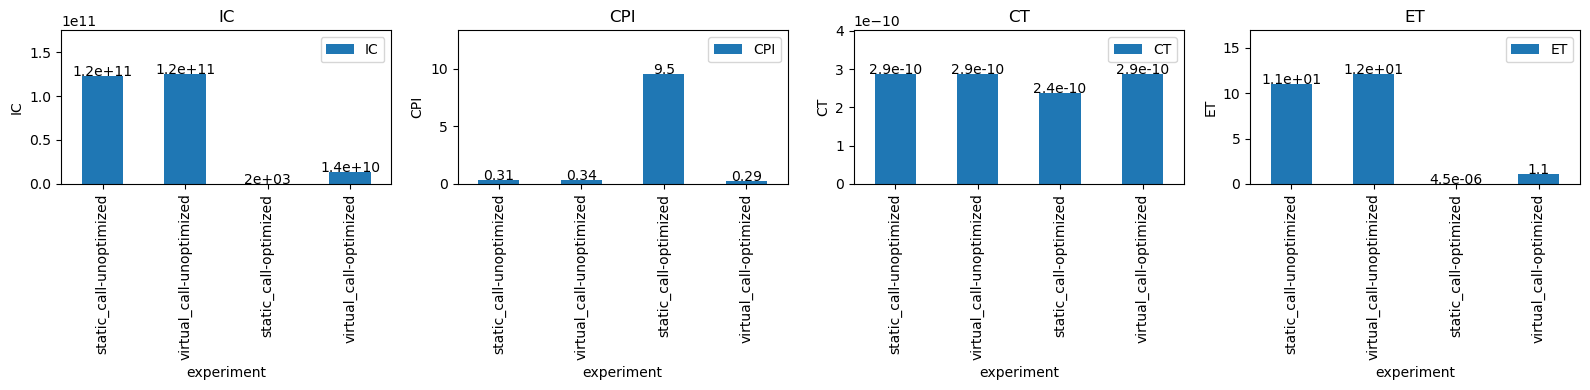

In [47]:
unopt = render_csv("virt_unopt.csv")
unopt['optimizations'] = "unoptimized"
opt = render_csv("virt_opt.csv")
opt['optimizations'] = "optimized"
all = unopt.append(opt)
all["experiment"] = all["function"] + "-" + all["optimizations"]
display(all[["experiment", "IC", "CPI", "CT", "ET"]])
plotPEBar(df=all, what=[("experiment", "IC"), ("experiment", "CPI"), ("experiment", "CT"), ("experiment", "ET")])

<div class="question correctness points-2">
    
<div class="question-text">
    
How much speedup does the static call to `foo()` provide over the virtual call to `foo()` "unoptimized" case?  How about in the optimized case?
</div>

<div class="answer">


    
**Speedup in unoptimized case:** 0.90850722603
    
**Speedup in the optimized case:** 0.00000445625
</div>
    
</div>

This is the main cost of virtual functions:  It's not that calling virtual functions is expensive, it's that using virtual functions vastly reduces the effectiveness of compiler optimizations.

And this is why the `stl` containers don't use virtual functions -- they are all template based instead.  Templates are processed at compile time, so the compiler always knows what's getting called and it can apply inlining.  Massive reduction in call graph complexity we saw for `std::sort` would not have been possible if the `std::sort` used virtual functions to implement a generic sorting algorithm.

<div class="question optional">
    
<div class="question-text">
    
How much speedup do optimizations provide for the `virtual_call()`?  What did the compiler do to achieve this?
</div>

<div class="answer">
    
</div>
    
</div>

# Practical Rules For Using Compiler Optimizations

The single most important lesson to learn from this lab is that you should compile your code with optimizations turned on.  It is the easiest 2-10x boost in performance you can get.

Fortunately, it's pretty simple to do that.  Somewhat overwhelmingly, Gcc provides around [300 flags](https://gcc.gnu.org/onlinedocs/gcc/Optimize-Options.html) that control optimization and a bunch of tunable parameters as well, but in practice you don't need to worry about them.

There are just a handful that are typically useful.  Here's what the gcc docs have to say about them:

* `-O0`: Perform no optimizations.  You should never use this unless you're just playing around.
* `-O1`: "the compiler tries to reduce code size and execution time, without performing any optimizations that take a great deal of compilation time."
* `-O2`: "GCC performs nearly all supported optimizations that do not involve a space-speed tradeoff."  "Space" in this context means the number of static instructions generated.
* `-O3`: "Optimize yet more"
* `-Og`: "Optimize debugging experience. -Og should be the optimization level of choice for the standard edit-compile-debug cycle, offering a reasonable level of optimization while maintaining fast compilation and a good debugging experience."

Among these, `-Og` is a relatively new flag that "optimizes the debugging experience".  What does that mean?  The optimizations we described above (especially function inlining, but others as well) can cause strange behavior when you debug.  For instance, consider the inlined version of `one()` in the previous section.  If you set a break point on `std::sort()`, your code would never stop because that function is never called.  Likewise, we've seen loops and variables disappear.  This can make debugging really difficult.  On the other hand, compiling with `-O0` will make the code much, much slower (just look at the graphs above).  So `-Og` strikes a balance:  It optimizes but avoids these problems in debugging.

Here's what that balance looks like:

optimization           IC       CPI            CT        ET
0          -O0  10703331579  0.987859  2.869498e-10  3.034029
0          -O3   1767228663  2.203297  2.871586e-10  1.118118
0          -Og   1812245093  2.154248  2.869927e-10  1.120427

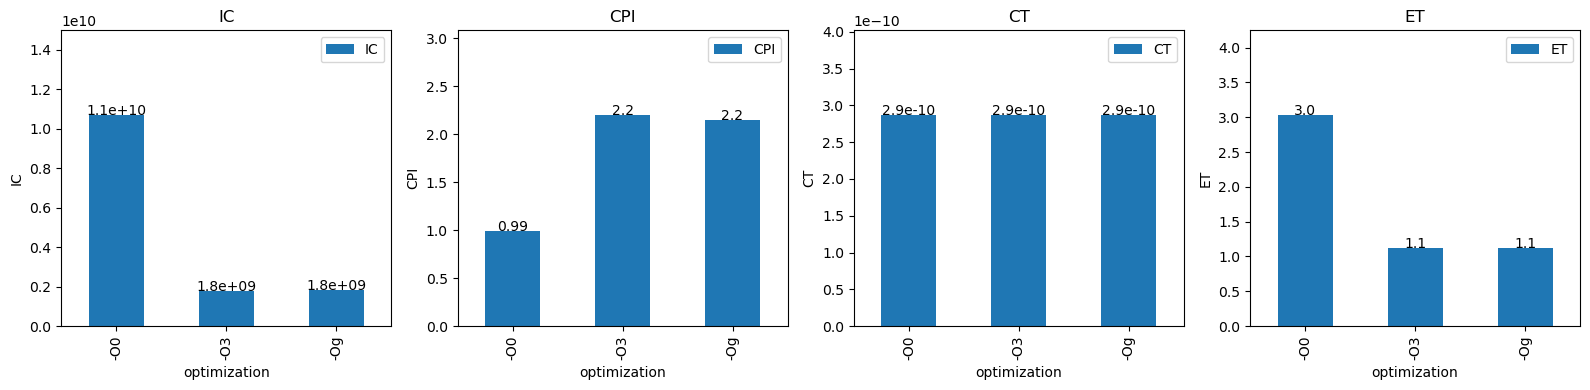

In [301]:
df = render_csv("sort_0.csv").append(render_csv("sort_3.csv")).append(render_csv("sort_g.csv")) 
display(df[["optimization", "IC", "CPI", "CT","ET"]])
plotPEBar(df=df,
          what=[("optimization", "IC"),
                ("optimization", "CPI"),
                ("optimization", "CT"), 
                ("optimization", "ET")])

Not a huge difference...  You might conclude that `-O3` is not worth it, but I'd want to see data for a range of different, more realistic programs.  Our examples here are tiny.

So, in practice you should:

* Use `-Og` when debugging and developing.
* Use `-O3` when deploying.

The other 298 options have their uses, but unless you are interested in squeezing out the very last drop of performance (and doing the experiments to check that the optimizations help), they are not worth the effort and are pretty hard to use productively.  It's usually a lot of trial and error.

That said, by the time you've finished this class, you'll have a pretty deep understanding of CPU performance and how to look "under the hood" at what the compiler is doing.  So, you'll be in a good position to read about those other options an design meaningful experiments that let you measure their impact.



# Limitations of the Compiler

Compiler optimizations can do a lot, but they are not magical.  In particular, they cannot save you from choosing the wrong algorithm or data stucture for a particular task.  Indeed, choosing the right algorithms and data structures can have even larger impacts on performance.

For instance, consider four well-known sorting algorithms `bubble_sort`, `insertion_sort`, `quick_sort`, and `stl:sort` (the implementation in the C++ `stl`.  It could be any $O(n \log(n))$ sorting algorithm):

In [336]:
render_code("sort.cpp", show="bubble_sort")
render_code("sort.cpp", show="insertion_sort")
render_code("sort.cpp", show=("//START", "//END"))
render_code("sort.cpp", show="stl_sort")

// sort.cpp:24-41 (18 lines)
uint64_t* bubble_sort(uint64_t *list, uint64_t size)
{
	uint64_t temp;
	for(uint64_t i=0; i<size; i++)
	{
		for(uint64_t j=size-1; j>i; j--)
		{
			if(list[j]<list[j-1])
			{
				temp=list[j-1];
				list[j-1]=list[j];
				list[j]=temp;
			}
		}
	}
	CHECK(list);
	return NULL;
}

// sort.cpp:48-66 (19 lines)
uint64_t* insertion_sort(uint64_t *list, uint64_t size)
{
	for(uint64_t j=1;j<size;j++)
	{
		uint64_t key=list[j];
		uint64_t i = j-1;
		while(list[i] > key)
		{
			list[i+1]=list[i];
			if (i == 0)
				break;
			i=i-1;
		}
		list[i+1]=key;

	}
	CHECK(list);
	return NULL;
}

// sort.cpp:140-179 (40 lines)
//START
uint64_t partition(uint64_t *list, uint64_t p, uint64_t r)
{
	uint64_t pivot, index, exchange_temp;
	pivot = list[r];
	index = p - 1;
	for(uint64_t i = p; i < r; i++)
	{
		if(list[i] <= pivot)
		{
			index++;
			exchange_temp = list[i];
			list[i] = list[index];
			list[index] = exchange_temp;
		}
	}
	exchange_temp = list[r];
	list[r] = list[index+1];
	list[index+1] = exchange_temp;
	return index+1;
}

void quicksort_aux(uint64_t *list, uint64_t p, uint64_t r)
{
	uint64_t q;
	if(p<r)
	{
		q = partition(list, p, r);
		quicksort_aux(list, p, q-1);
		quicksort_aux(list, q+1, r);
	}
}

uint64_t* quick_sort(uint64_t *list, uint64_t size)
{
	quicksort_aux(list,0, size-1);
	CHECK(list);
	return NULL;
}
//END

// sort.cpp:181-186 (6 lines)
uint64_t * stl_sort(uint64_t * array,
		    uint64_t  size) {
	std::sort(&array[0], &array[size]);
	CHECK(array);
	return NULL;
}

Let's see how they perform sorting 64k elements:

In [17]:
!make sort_O3.exe
!cse142  job run --take "sort*.exe" --take '*.cfg' './sort_O3.exe --function bubble_sort insertion_sort quick_sort stl_sort --reps 1 --stats sorts.csv  --MHz 3500 --size 65536  --stat-set PE.cfg'

make: 'sort_O3.exe' is up to date.
You are submitting a job for lab "Lab 2: The Compiler" (compiler).
The due date for Lab 2: The Compiler has passed.  You can still submit, but you might want to submit for the current lab since the target docker image may be different, and things may not behave as described in the lab writeup.
Creating job 285fc855-1c84-4db4-9520-0dad4cf8fee8 0.00 0.00
Ready for submission. 3.09 3.09
Job 285fc855-1c84-4db4-9520-0dad4cf8fee8 is in state 'PUBLISHED'. 2.89 5.98 
Job 285fc855-1c84-4db4-9520-0dad4cf8fee8 is in state 'SCHEDULED'. 1.04 7.02 
Job 285fc855-1c84-4db4-9520-0dad4cf8fee8 is in state 'RUNNING'. 1.04 8.06......... 
Job 285fc855-1c84-4db4-9520-0dad4cf8fee8 is in state 'DONE_RUNNING'. 10.42 18.48... 
Job 285fc855-1c84-4db4-9520-0dad4cf8fee8 succeeded. 4.16 22.64Writing results 1.00 23.64
Loading PAPI engine.
Tracking PAPI_TOT_INS
Tracking PAPI_TOT_CYC
Running bubble_sort
Running insertion_sort
Running quick_sort
Running stl_sort
Updated these files: .

function           IC       CPI            CT        ET
0     bubble_sort  20395262154  1.440634  2.869406e-10  8.430920
1  insertion_sort   9653771354  0.230573  2.869345e-10  0.638686
2      quick_sort     16811148  0.897472  2.876660e-10  0.004340
3        stl_sort      8035847  1.892386  2.876496e-10  0.004374

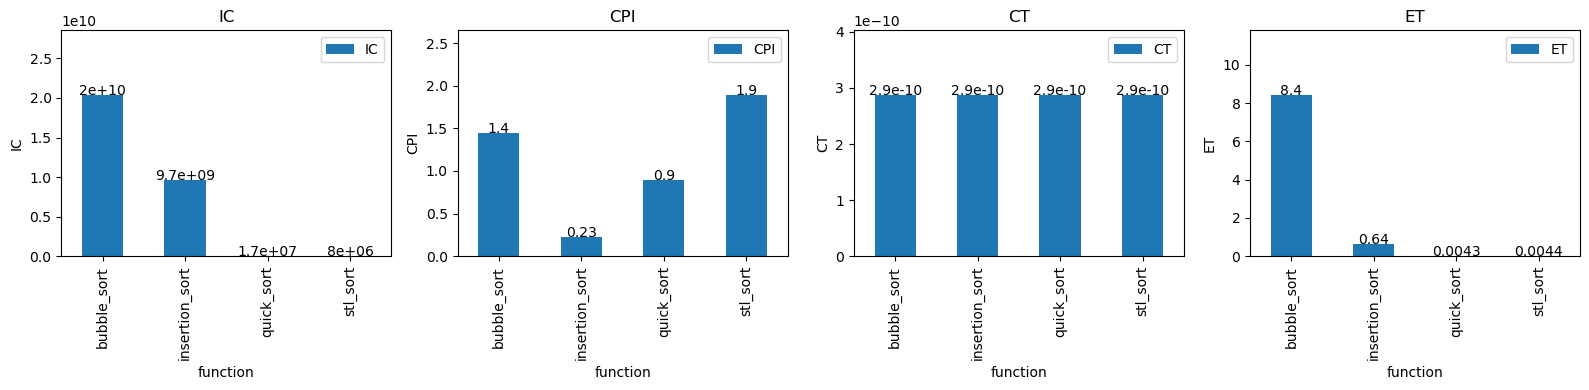

In [51]:

plotPEBar("sorts.csv", what=[("function", "IC"), ("function", "CPI"), ("function", "CT"), ("function", "ET")])
display(render_csv("sorts.csv", ["function", "IC", "CPI", "CT", "ET"]))

<div class="question correctness points-1">

<div class="question-text">

What's the speedup of `quick_sort` over `bubble_sort`?
</div>
    
<div class="answer">
    0.00051477181
    
</div>
</div>

I'm actually not very happy with this measurement.  The runtime of `quick_sort` is too short for me to really think it's accurate -- I'd rather the runtime be in the 1-second range.  But getting `quick_sort` to take 1 second requires me to increase the array size by 100x.  Which would increase `bubble_sort`'s runtime by 10,000x, to about 30 hours.  In any case, lesson is clear: Don't use bubble sort!

But it's not just a question of choosing among different approaches to the same problem.  You need to make sure you are solving the problem you need to solve.  Consider the problem of finding the smallest value in an array.  Here's one implementation:

mkdir -p build/
cp find_min.cpp build/find_min.cpp 
gcc-8 -c -Wall -Werror -g    -fPIC -pthread    -O3 -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/find_min.cpp -o build/find_min.o
g++-8 build/find_min.o build/main.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o find_min.exe
You are submitting a job for lab "Lab 2: The Compiler" (compiler).
The due date for Lab 2: The Compiler has passed.  You can still submit, but you might want to submit for the current lab since the target docker image may be different, and things may not behave as described in the lab writeup.
Creating job 3603e61b-22a3-423f-b603-f1fdc69518ca 0.00 0.00
Ready for submission. 2.59 2.59
Job 3603e61b-22a3-423f-b603-f1fdc69518ca is in state 'PUBLISHED'. 1.6

function          IC       CPI            CT        ET
0  find_min_reference  1168020418  2.092818  2.870719e-10  0.701734
1   find_min_solution    39323516  1.534580  2.875638e-10  0.017353

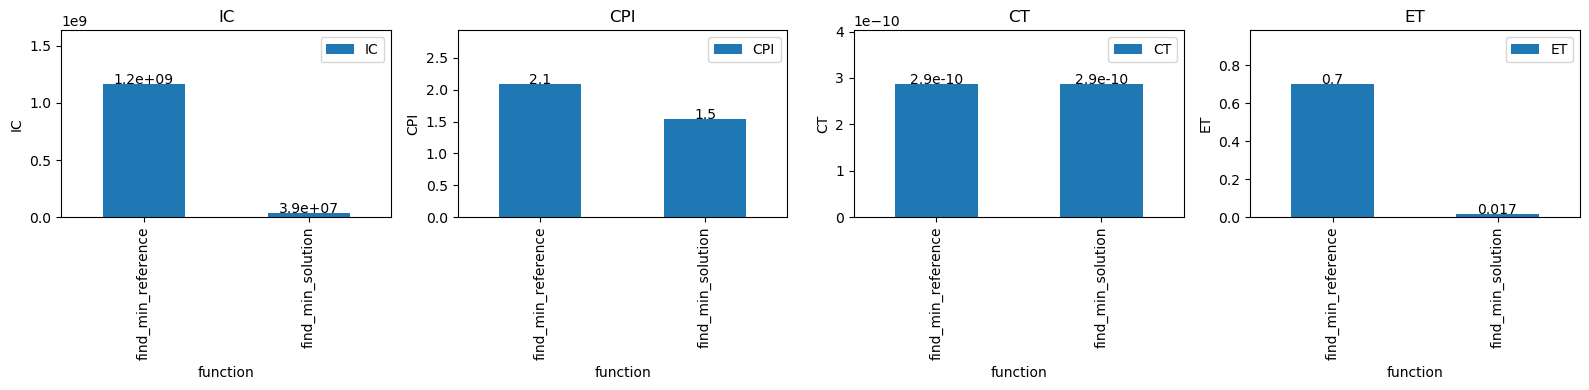

In [22]:

fiddle("find_min.cpp", compile=False, code=r"""
#include"function_map.hpp"
#include<algorithm>
#include<cstdint>

// Reference implementation
uint64_t find_min_reference(uint64_t * a, uint64_t size) {
    std::sort(a, &a[size]);
    return a[0];
}

FUNCTION("find_min", find_min_reference); // Don't edit this.
/////////////////////////////////////////
// Don't edit anything above this line //
/////////////////////////////////////////

// Below you can implement as many different versions of the function as you'd like.
// To add another implementation, you need to do two things:
//
// 1. Create a function with the same signature (arguments and return type) and a different name.
// 2. Call "FUNCTION" macro with "find_min" as the first argument and the new function as the second.
//
// You can see an example below with find_min_variant() 

uint64_t find_min_solution(uint64_t * a, uint64_t size) {
    uint64_t min = 100;
    for(uint64_t i = 0; i < size; i++){
        if(a[i] < min){
            min = a[i];
        }
    }
    return min;
}




FUNCTION("find_min", find_min_solution);

""")

!make find_min.exe
!cse142 job run  --take find_min.exe --take PE.cfg "./find_min.exe --function ALL  --stats find_min.csv --MHz 3500 --size 6553600 --stat-set PE.cfg"

plotPEBar("find_min.csv", what=[("function", "IC"),
                                ("function", "CPI"),
                                ("function", "CT"),
                                ("function", "ET")])
display(render_csv("find_min.csv", columns=["function", "IC", "CPI", "CT", "ET"]))

The question below is a simple programming assignment.  You can do it in the fiddle above.  The fiddle will save all the versions you write as `.fiddle_backups/find_min_0001.cpp`, `.fiddle_backups/find_min_0002.cpp`, etc.

<div class="question correctness points-5">

<div class="question-text">

Modify `find_min_solution()` in the fiddle above to use a more appropriate, faster algorithm.  What speedup does your version achieve relative to `find_min_reference()`? (Points for this question depend on the correctness of your code and the performance it achieves.  Your target is 35x.).
</div>    

<div class="answer">    

**Speedup:** 
    40.438771394



    
</div>
</div>       

![light speed!](https://media3.giphy.com/media/HjeIqm3MxURFK/100.webp?cid=ecf05e476dp5ds6s8injvfa180k7xiz73zeiz32owp48gcva&rid=100.webp&ct=g)

# Programming Assignment

The programming assignment for this lab is a warm up for the programming assignments in the next three labs.  The assignment is to optimize the performance of the function below.

Here's how to approach this lab.  

1. Read through the whole thing and run the example code in the code cells.  
2. Do your work in the "Do Your Work Here" section.  It has the key commands you'll need to evaluate and analyze your results.
3. When you are happy with your implementation, answer the questions in "Analyzing Your Implementation".
4. When you are all done, go to the Final Measurement section and follow those instructions.


## The Function

In [337]:
render_code("sum.cpp", show="sum_of_locations")

// sum.cpp:1-94 (94 lines)
#include <cstdlib>
#include "archlab.hpp"
#include <unistd.h>
#include"omp.h"
#include"papi.h"
#include<algorithm>
#include<cstdint>
#include<unordered_set>
#include<map>
#include"function_map.hpp"



#define START_C extern "C" { // this just hides the braces from the editor, so it won't try to indent everything.
#define END_C  }


START_C
bool binarySearh(uint64_t a, uint64_t *search_space,  uint32_t l, uint32_t r){
        if( l > r ){
            return false;
        }else{
            uint32_t mid = (r+l)/2;
            if( a == search_space[mid]){
                return true;
            }else if(a > search_space[mid]){
                return binarySearh(a, search_space, mid+1, r);
            }else{
                return binarySearh(a, search_space, l, mid-1);
            }
        }
}




uint64_t sum_of_locations_solution(uint64_t *search_space, uint32_t search_space_size, uint64_t* queries, uint32_t query_count)
{
        std::sort(search_space, &search_space[search_space_size]);
        uint32_t r = 0;
        for(uint32_t i = 0; i < query_count; i++) {

            if( queries[i] < search_space[0] ){      
                continue;
            }
            if( queries[i] > search_space[search_space_size - 1] ){
                continue;
            }
            if(binarySearh(queries[i],search_space, 0 , search_space_size-1)){
                r += i;
            }
        }
	return r;
}


/*{
    std::unordered_set<uint64_t> mySet;
    uint64_t max  = -1000;
    uint64_t min  = 1000;
    for(uint32_t j = 0; j < search_space_size; j++){
        mySet.insert(search_space[j]);
        if(search_space[j] > max){
            max = search_space[j];
        }
        if(search_space[j] < min){
            min = search_space[j];
        }
    }
    uint32_t r = 0;
	for(uint32_t i = 0; i < query_count; i++) {
        if( queries[i] < min ){
            continue;
        }
        if(queries[i] > max){
            continue;
        }
        std::unordered_set<uint64_t>::const_iterator it = mySet.find (queries[i]);
        if ( it != mySet.end() ){
            r += i;
        }
	}
	return r;
}*/




// hello

FUNCTION("sum_impl", sum_of_locations_solution);

END_C

The function takes two arrays: one contains a list of unique integers (`search_space`) while the other (`queries`) has a list of query values.  For each query, the function checks if the value is in `search_space`.  Then it returns the sum of the "query numbers" (i.e., the index of the query in `queries`) for the values it found.

Your task is simple: make it run as quickly as possible.

## Compiling, Running, Measuring

For programming assignments, you'll need to use some shell commands.  You have a couple choices:

1.  You can work in the jupyter notebook using the `!` character to run shell commands in code cells.  They are all provided below.
2.  You can open up an terminal in Jupyter notebook.

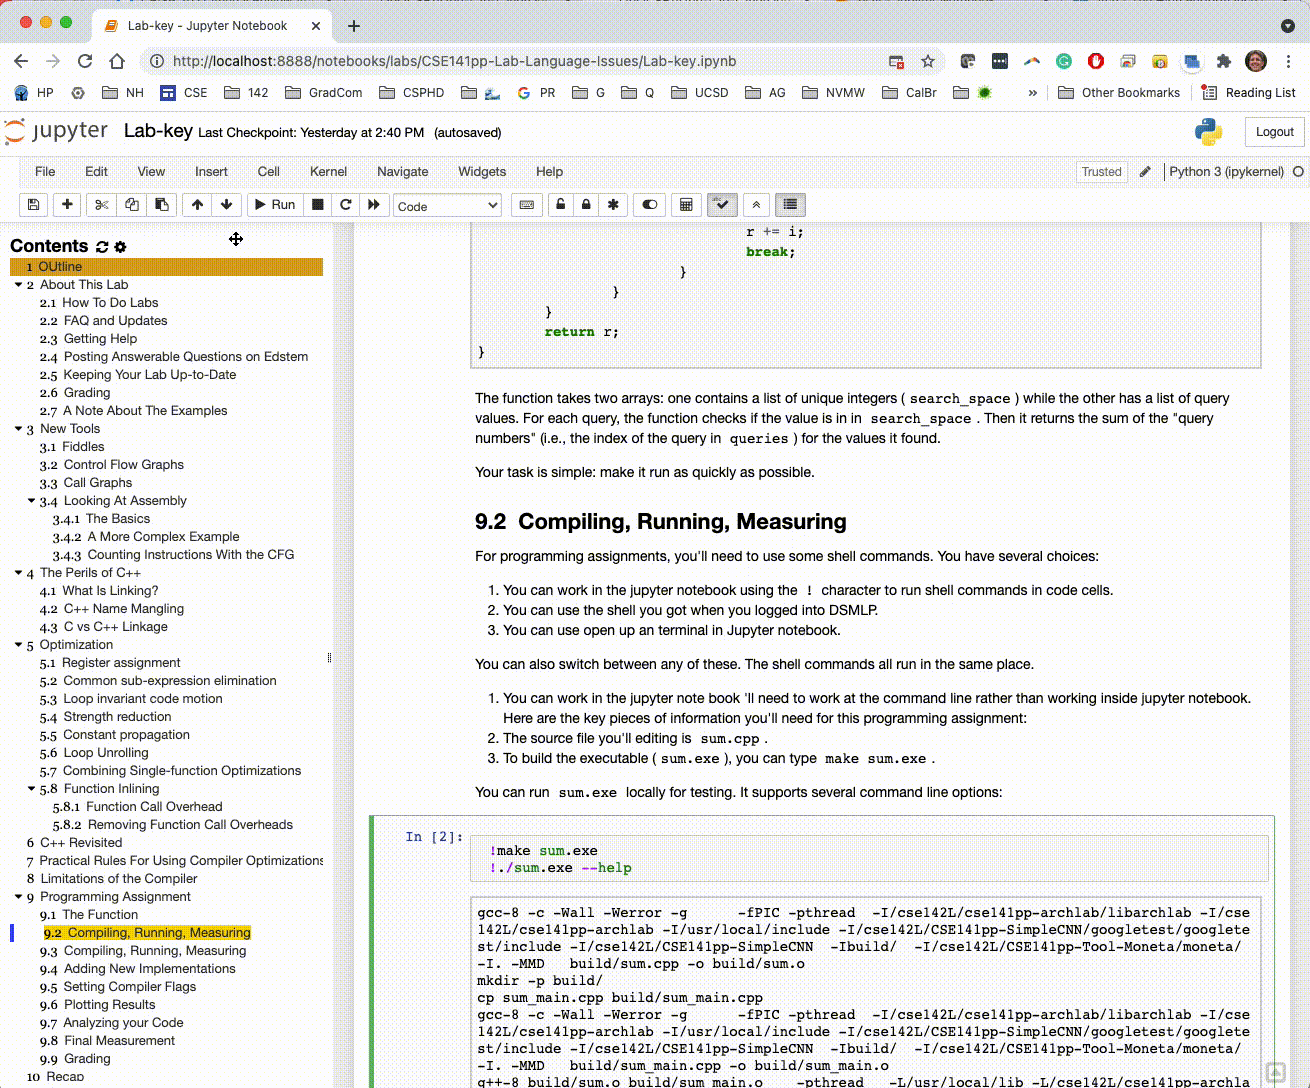

You can also switch between any of these options.  The shell commands all run in the same directory structure.

Here are the key pieces of information you'll need for this programming assignment:

1.  The source file you'll editing is `sum.cpp`.
2.  To build the executable (`sum.exe`), you can type `make sum.exe`.

You can run `sum.exe` locally for testing.  It supports several command line options:

In [274]:
!make sum.exe
!./sum.exe --help

make: 'sum.exe' is up to date.
ArchLab driver:
  --MHz arg (=-1)                       Which clock rate to run.  Possibilities
                                        on this machine are: -1 
  --function arg (=sum_of_locations)    Which function to run.  Options are: 
                                        'sum_of_locations' 'sum_of_locations_so
                                        lution' or 'ALL'.
  --space-size arg (=2097152)           Search space size.  Pass multiple 
                                        values to run with multiple 
                                        space_sizes.
  --queries arg (=1024)                 Number of queries to run.  Pass 
                                        multiple values to run with multiple 
                                        query_counts.
  --reps arg (=1)                       How many times to repeat the 
                                        experiment.
  --iters arg (=1)                      How many times to run the fu

The ones that might be helpful in this lab are:

* `--function` which will let you select an implementation to test.
* `--stats` which controls where your data goes.
* `--space-size` controls the search space size.
* `--queries` controls how many queries to run.
* `--seed` sets the random seed.
* `--function` determines which functions will run. You enter a subset of those listed above if you want or `ALL`
* `--stat-set` configures the performance counters. `PE.cfg` collects `IC`, `CPI`, `CT`, and `ET` data.

You can measure performance in the cloud with this command line (Note, I've set `--MHz 3500`.  The default is 3501, but that will enable TurboBoost and make our performance unpredictable):

In [342]:
!make sum.exe
!cse142 job run --lab compiler "./sum.exe --function ALL --MHz 3500 --stats benchmark.csv --stat-set PE.cfg --stat-set bench.cfg"

mkdir -p build/
cp sum.cpp build/sum.cpp 
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/sum.cpp -o build/sum.o
g++-8 build/sum.o build/sum_main.o build/sum_baseline.o    -pthread   -L/usr/local/lib -L/cse142L/cse141pp-archlab/libarchlab -larchlab -lpapi -lboost_program_options -lm -lquadmath -ldl    -o sum.exe
You are submitting a job for lab "Lab 2: The Compiler" (compiler).
The due date for Lab 2: The Compiler has passed.  You can still submit, but you might want to submit for the current lab since the target docker image may be different, and things may not behave as described in the lab writeup.
Creating job 0c24b0ab-7964-450e-8f8e-6d9466104371 0.00 0.00
Ready for submission. 3.52 3.52
Job 0c24b0ab-7964-450e-8f8e-6d9466104371 is in state 'PUBLISHED'. 2.15 5.67 


Note that the command line for `./sum.exe` is in quotes and the command line arguments for `sum.exe` go in quotes with it.

Before the `sum.exe` command line is the command to run `sum.exe` in the cloud.

If you run the command above on your starter code, it'll produce a `csv` file called `benchmark.csv` with two lines:

In [343]:
display(render_csv("benchmark.csv"))

space_size  query_count  seed  result  cmdlineMHz  \
0     2097152         1024     1  256702        3500   
1     2097152         1024     1  256702        3500   

                    function  rep           IC        ET       cycles  \
0           sum_of_locations    0  27288252520  8.657674  30167084092   
1  sum_of_locations_solution    0   3954588196  1.310457   4440105788   

             CT       CPI   ET_calc      realMHz   speedup  Unnamed: 15  
0  2.869907e-10  1.105497  8.657674  3484.433058  0.891695          NaN  
1  2.951408e-10  1.122773  1.310457  3388.212992  5.891077          NaN

The output of the program is in `result` and the execution time is in `ET`.

You can print the CSV file nicely at the command line:

In [302]:
!pretty-csv benchmark.csv

space_size|query_count|seed|result  |cmdlineMHz|function                 |rep|IC      |ET   |cycles  |CT      |CPI  |ET_calc|realMHz |speedup|
----------|-----------|----|--------|----------|-------------------------|---|--------|-----|--------|--------|-----|-------|--------|-------|
2.1e+06   |1.02e+03   |1.0 |2.57e+05|3.5e+03   |sum_of_locations         |0.0|2.73e+10|11.2 |3.89e+10|2.87e-10|1.42 |11.2   |3.48e+03|0.692  |
2.1e+06   |1.02e+03   |1.0 |2.57e+05|3.5e+03   |sum_of_locations_solution|0.0|2.05e+09|0.578|2.01e+09|2.88e-10|0.981|0.578  |3.47e+03|13.3   |


## Adding New Implementations

The starter code for `sum.cpp` has one solution in it: `sum_of_locations_solution()`.    The baseline (unoptimized) implementation is in `baseline_sum.cpp` and is called `sum_of_locations()`.  `sum_of_locations_solution()` in `sum.cpp` should eventually contain your best implementation, and that's what we will grade.  You can add as many other implementations to `sum.cpp` as you'd like.  

To add a new implementation, just create a new function with a new name (e.g., `sum_of_locations_new_version`) but same arguments and return value.  Then add this immediately after the end of the function:

```
FUNCTION("sum_impl", sum_of_locations_new_version);
```

That will allow you to pass `--function sum_of_locations_new_version` to test your new version.


## Setting Compiler Flags

There are two ways to set compiler flags for your code.  When you turn you code into the autograder for credit, you'll need to add the compiler flags in `config.make`.  Here's the initial contents:

In [338]:
render_code("config.make")

// config.make:1-3 (3 lines)
SUM_OPTIMIZE=

So, it will compile your code with no optimizations.

To edit `config.make`, you can open up a terminal and edit it with `emacs`, `vim`, or `pico`.

You can also pass `SUM_OPTIMIZE` to make.  Run this cell and the `-finline-functions` appears in the command that compiles `sum.cpp`.

In [278]:
!make clean
!make sum.exe SUM_OPTIMIZE=-finline-functions

rm -rf build/ .tmp
rm -rf *.gv *-gv.pdf *.pin-trace #*.csv 
rm -rf *.exe *.o *.i *.s *.out *.d *.gcda *.gcno *.gprof *.gcov *.csv.raw core	
rm -rf 
mkdir -p build/
cp sum.cpp build/sum.cpp 
gcc-8 -c -Wall -Werror -g    -fPIC -pthread    -finline-functions -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/sum.cpp -o build/sum.o
mkdir -p build/
cp sum_main.cpp build/sum_main.cpp 
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/sum_main.cpp -o build/sum_main.o
mkdir -p build/
cp sum_baseline.cpp build/sum_baseline.cpp 
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchl

## Things To Try

Here are some suggestions on how to approach the lab.

1.  Make sure to set appropriate compiler flags
2.  Think about _what_ `sum_of_locations()` is trying to achieve rather than _how_ it is doing it. 
3.  If you had to achieve the same thing, how would you approach it?
4.  How does `sum_of_locations()` use each of its data structures?  What operations does it apply to each of them?
5.  Is there a better choice of data structure?
6.  The C++ standard template library is available for you to use.

You can assume that `queries` has lots of entries.

To achieve the target speedup you will need to modify the code/algorithm _and_ apply compiler optimizations.


## Useful Tools

The tools we'll use in the labs to manipulate and plot data are based on two widely-used software packages:  [Pandas](https://pandas.pydata.org/) and [matplotlib](https://matplotlib.org/).  They are powerful software packages with complex interfaces.  Most of the tools you'll use directly are defined in `notebook.py`.  These are the same functions that I've used above plot results, so this Jupyter Notebook is full of examples of how they work.  The portion of the lab starting with [C++ Revisited](#C++-Revisited) is especially useful in this regard.

The documentation below provides an introduction to the tools in `notebook.py`.

### Data Frames

Data frames are a fancy sort of 2-dimensional array.  They have rows of data and named columns -- very much like the CSV files that our experiments generate.  Getting a dataframe from a CSV file is easy:

In [279]:
df = render_csv("benchmark.csv")

`df` now contains the contents of `benchmark.csv` and we can inspect it like so:

In [280]:
display(df)

space_size  query_count  seed  result  cmdlineMHz  \
0     2097152         1024     1  256702        3500   
1     2097152         1024     1  256702        3500   

                    function  rep           IC        ET       cycles  \
0           sum_of_locations    0  27288252299  8.345150  29075611854   
1  sum_of_locations_solution    0   2046369003  0.546354   1895332466   

             CT       CPI   ET_calc      realMHz    speedup  Unnamed: 15  
0  2.870154e-10  1.065499  8.345150  3484.133024   0.925088          NaN  
1  2.882630e-10  0.926193  0.546354  3469.053849  14.130025          NaN

The numbers down the side are the "index" and the bold names at the top of the columns are the column names.

We can "slice" the data frame as well to extract a subset of its columns.  We do this by passing an array of column names in square braces (`[]`):

In [281]:
display(df[["function", "IC", "CPI", "CT","ET"]])

function           IC       CPI            CT        ET
0           sum_of_locations  27288252299  1.065499  2.870154e-10  8.345150
1  sum_of_locations_solution   2046369003  0.926193  2.882630e-10  0.546354

We can concatenate multiple dataframes like so:

In [282]:
df2 = render_csv("benchmark.csv")
df3 = df.append(df2)
display(df3[["function", "IC", "CPI", "CT","ET"]])

function           IC       CPI            CT        ET
0           sum_of_locations  27288252299  1.065499  2.870154e-10  8.345150
1  sum_of_locations_solution   2046369003  0.926193  2.882630e-10  0.546354
0           sum_of_locations  27288252299  1.065499  2.870154e-10  8.345150
1  sum_of_locations_solution   2046369003  0.926193  2.882630e-10  0.546354

Note that `append` returns a new dataframe (`df3`) rather than modifying `df`.

### Plotting Results

[Matplotlib](https://matplotlib.org/) is an extremely flexible and powerful plotting tool that we could spend a whole quarter on.  Fortunately, `notebook.py` has some convenient helper functions in it that make it easy graph data in data frames.

One of those helpers in `plotPEBar`.  The cell below, creates a dataframe and then plots several bar charts. The `what` parameter is a list of tuples (pairs of values in `(` and `)`).  The first value in each tuple is what ends up on the x-axis.  The second item of the tuple is plotted on the y axis.  You can plot as many bar charts as you want and it'll plot all the entries in the dataframe:

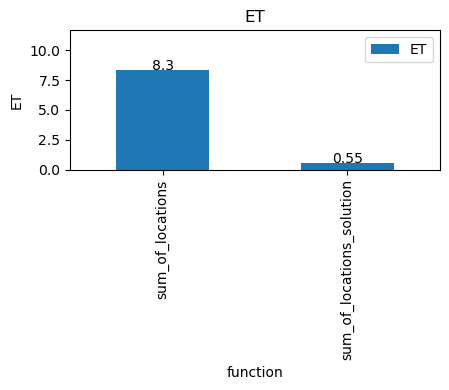

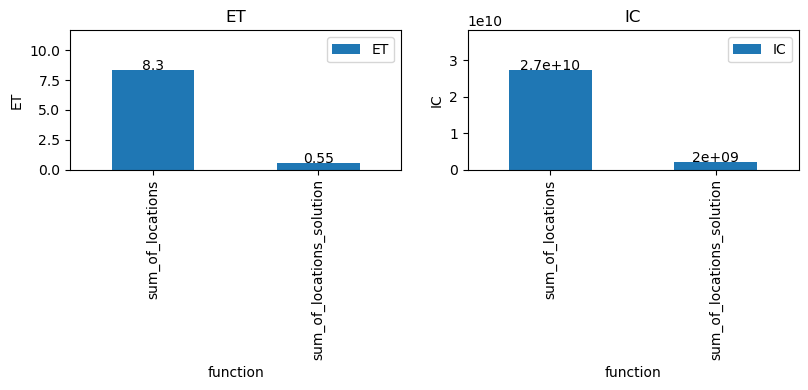

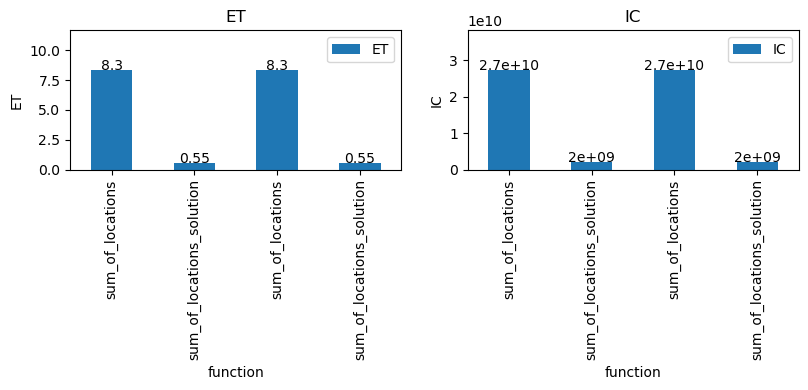

In [283]:
df = render_csv("benchmark.csv")
plotPEBar(df=df, what=[("function", "ET")])
plotPEBar(df=df, what=[("function", "ET"),("function", "IC")])
plotPEBar(df=df.append(df), what=[("function", "ET"),("function", "IC")])

### Adding Tags to Experiments

In the first lab, you saw many examples of how we can run experiments with different parameter values with a single command line.  For instance, here's a command line that runs your solution with multiple query list sizes:

In [284]:
!cse142 job run --lab compiler "./sum.exe  --MHz 3500 --queries 1 10 100 --function sum_of_locations_solution --stats queries.csv --stat-set PE.cfg"

You are submitting a job for lab "Lab 2: The Compiler" (compiler).
The due date for Lab 2: The Compiler has passed.  You can still submit, but you might want to submit for the current lab since the target docker image may be different, and things may not behave as described in the lab writeup.
Creating job ca20e9b4-123e-4908-96d4-5c51330d5301 0.00 0.00
Ready for submission. 3.49 3.49
Job ca20e9b4-123e-4908-96d4-5c51330d5301 is in state 'PUBLISHED'. 3.40 6.89 
Job ca20e9b4-123e-4908-96d4-5c51330d5301 is in state 'RUNNING'. 1.04 7.93.. 
Job ca20e9b4-123e-4908-96d4-5c51330d5301 is in state 'DONE_RUNNING'. 3.12 11.05.. 
Job ca20e9b4-123e-4908-96d4-5c51330d5301 succeeded. 3.12 14.17Writing results 1.00 15.17
Loading PAPI engine.
Tracking PAPI_TOT_INS
Tracking PAPI_TOT_CYC
0
0
0
Updated these files: ./queries.csv
./queries.csv.raw
Job Complete 0.43 15.61


In [285]:
render_csv("queries.csv")

space_size  query_count  seed  result  cmdlineMHz  \
0     2097152            1     1       0        3500   
1     2097152           10     1      31        3500   
2     2097152          100     1    2042        3500   

                    function  rep          IC        ET      cycles  \
0  sum_of_locations_solution    0  2041808176  0.545034  1889912480   
1  sum_of_locations_solution    0  1474858924  0.209930   731468678   
2  sum_of_locations_solution    0  1475207055  0.210934   734790946   

             CT       CPI   ET_calc      realMHz  Unnamed: 14  
0  2.883910e-10  0.925607  0.545034  3467.514950          NaN  
1  2.869982e-10  0.495958  0.209930  3484.342617          NaN  
2  2.870666e-10  0.498093  0.210934  3483.512434          NaN

However, if you wanted to, for instance, compare the performance of the your code running under two different sets of compiler flags, that approach won't work because you need two different executable.  You could do something like this:

In [286]:
!make clean;
!make sum.exe SUM_OPTIMIZE=-finline-functions
!cse142 job run  --lab compiler "./sum.exe  --MHz 3500 --queries 1 --function sum_of_locations_solution --stats inline.csv --stat-set PE.cfg"
!make clean;
!make sum.exe SUM_OPTIMIZE=-funroll-loops
!cse142 job run  --lab compiler "./sum.exe  --MHz 3500 --queries 1 --function sum_of_locations_solution --stats unroll.csv --stat-set PE.cfg"

rm -rf build/ .tmp
rm -rf *.gv *-gv.pdf *.pin-trace #*.csv 
rm -rf *.exe *.o *.i *.s *.out *.d *.gcda *.gcno *.gprof *.gcov *.csv.raw core	
rm -rf 
mkdir -p build/
cp sum.cpp build/sum.cpp 
gcc-8 -c -Wall -Werror -g    -fPIC -pthread    -finline-functions -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/sum.cpp -o build/sum.o
mkdir -p build/
cp sum_main.cpp build/sum_main.cpp 
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/sum_main.cpp -o build/sum_main.o
mkdir -p build/
cp sum_baseline.cpp build/sum_baseline.cpp 
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchl

And then display the results like this:

In [287]:
inline = render_csv("inline.csv")
unroll = render_csv("unroll.csv")
both = inline.append(unroll)
display(both)

space_size  query_count  seed  result  cmdlineMHz  \
0     2097152            1     1       0        3500   
0     2097152            1     1       0        3500   

                    function  rep          IC        ET      cycles  \
0  sum_of_locations_solution    0  2041808184  0.546014  1893723329   
0  sum_of_locations_solution    0  2041808161  0.538936  1869191865   

             CT       CPI   ET_calc      realMHz  Unnamed: 14  
0  2.883284e-10  0.927474  0.546014  3468.266853          NaN  
0  2.883259e-10  0.915459  0.538936  3468.297829          NaN

But there's no way to tell which lines came from which file!  Oh no!

To solve this problem, you can pass `--tag`:

In [288]:
!make clean;
!make sum.exe SUM_OPTIMIZE=-finline-functions
!cse142 job run  --lab compiler "./sum.exe  --MHz 3500 --queries 1 --function sum_of_locations_solution --stats inline.csv --stat-set PE.cfg --tag opt=inline"
!make clean;
!make sum.exe SUM_OPTIMIZE=-funroll-loops
!cse142 job run  --lab compiler "./sum.exe  --MHz 3500 --queries 1 --function sum_of_locations_solution --stats unroll.csv --stat-set PE.cfg --tag opt=unroll"

rm -rf build/ .tmp
rm -rf *.gv *-gv.pdf *.pin-trace #*.csv 
rm -rf *.exe *.o *.i *.s *.out *.d *.gcda *.gcno *.gprof *.gcov *.csv.raw core	
rm -rf 
mkdir -p build/
cp sum.cpp build/sum.cpp 
gcc-8 -c -Wall -Werror -g    -fPIC -pthread    -finline-functions -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/sum.cpp -o build/sum.o
mkdir -p build/
cp sum_main.cpp build/sum_main.cpp 
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/sum_main.cpp -o build/sum_main.o
mkdir -p build/
cp sum_baseline.cpp build/sum_baseline.cpp 
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchl

And then we can do:

In [289]:
inline = render_csv("inline.csv")
unroll = render_csv("unroll.csv")
both = inline.append(unroll)
display(both)

opt  space_size  query_count  seed  result  cmdlineMHz  \
0  inline     2097152            1     1       0        3500   
0  unroll     2097152            1     1       0        3500   

                    function  rep          IC        ET      cycles  \
0  sum_of_locations_solution    0  2041808157  0.543431  1884890325   
0  sum_of_locations_solution    0  2041808240  0.584901  2026370636   

             CT       CPI   ET_calc      realMHz  Unnamed: 15  
0  2.883092e-10  0.923148  0.543431  3468.498019          NaN  
0  2.886448e-10  0.992439  0.584901  3464.465752          NaN

And now we have the `opt` column with our tag values in it, and we can then plot the results and display a tidier table:

opt        ET
0  inline  0.543431
0  unroll  0.584901

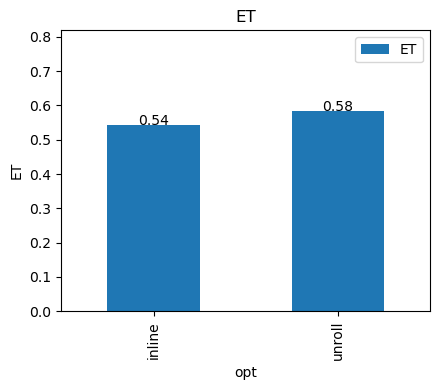

In [290]:
plotPEBar(df=both, what=[("opt", "ET")])
display(both[["opt", "ET"]])

### Doing Math on Data Frames

Data frames also make it easy to do math on your data. For instance, can compute the average error between `cmdlineMHz` and `realMHz`:

In [77]:
both["MHz_error"] = both["realMHz"]/both["cmdlineMHz"] - 1
display(both)

opt  space_size  query_count  seed  result  cmdlineMHz  \
0  inline     2097152            1     1       0        3500   
0  unroll     2097152            1     1       0        3500   

                    function  rep          IC        ET      cycles  \
0  sum_of_locations_solution    0  5995926048  1.869184  6368130453   
0  sum_of_locations_solution    0  5995926229  1.982079  6753062362   

             CT       CPI   ET_calc      realMHz  Unnamed: 15  MHz_error  
0  2.935217e-10  1.062076  1.869184  3406.903538          NaN  -0.026599  
0  2.935081e-10  1.126275  1.982079  3407.060913          NaN  -0.026554

There's a lot going on there.  The division is a "vector" or "element-wise" operation:  the result for each row is computed from the values in that row.  However, the `-1` is a "scalar" (single value), so it's subtracted from all the results.

You can also do math on strings:

In [78]:
both["experiment-name"] = both["function"] + "-" + both["opt"]

Which is useful drawing graphs:

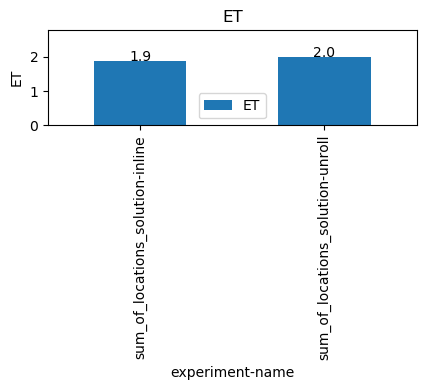

In [79]:
plotPEBar(df=both, what=[("experiment-name", "ET")])

## Do Your Work Here

This section is a workspace for you to do the assignment.  It has the basic commands you'll need to get through it.  You may find it useful to expand and add to this section. Go crazy!

### Compile And Run

In [291]:
!make sum.exe
!cse142 job run --lab compiler "./sum.exe --function ALL --MHz 3500 --stats benchmark.csv --stat-set PE.cfg --stat-set bench.cfg"

make: 'sum.exe' is up to date.
You are submitting a job for lab "Lab 2: The Compiler" (compiler).
The due date for Lab 2: The Compiler has passed.  You can still submit, but you might want to submit for the current lab since the target docker image may be different, and things may not behave as described in the lab writeup.
Creating job 23f5e8ff-a79c-4aac-a40f-c8f930425887 0.00 0.00
Ready for submission. 3.35 3.35
Job 23f5e8ff-a79c-4aac-a40f-c8f930425887 is in state 'PUBLISHED'. 2.13 5.48 
Job 23f5e8ff-a79c-4aac-a40f-c8f930425887 is in state 'RUNNING'. 1.04 6.52............ 
Job 23f5e8ff-a79c-4aac-a40f-c8f930425887 is in state 'DONE_RUNNING'. 13.57 20.09... 
Job 23f5e8ff-a79c-4aac-a40f-c8f930425887 succeeded. 4.16 24.25Writing results 1.00 25.25
Loading PAPI engine.
Tracking PAPI_TOT_INS
Tracking PAPI_TOT_CYC
0
0
Updated these files: ./benchmark.csv
./benchmark.csv.raw
Job Complete 0.53 25.78


### Graph Results

space_size  query_count  seed  result  cmdlineMHz  \
0     2097152         1024     1  256702        3500   
1     2097152         1024     1  256702        3500   

                    function  rep           IC         ET       cycles  \
0           sum_of_locations    0  27288255144  11.158438  38880775994   
1  sum_of_locations_solution    0   2046369033   0.578365   2006930671   

             CT       CPI    ET_calc      realMHz    speedup  Unnamed: 15  
0  2.869911e-10  1.424817  11.158438  3484.428207   0.691853          NaN  
1  2.881840e-10  0.980728   0.578365  3470.005170  13.347965          NaN

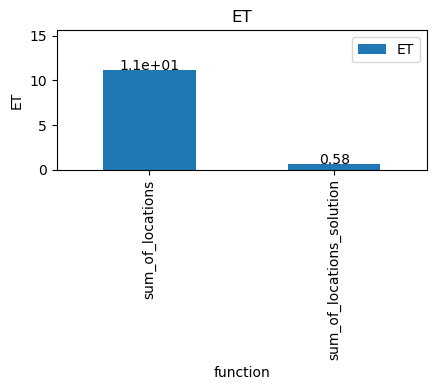

In [292]:
df = render_csv("benchmark.csv")
display(df)
plotPEBar(df=df, what=[("function", "ET")])

### Analyzing your Code With `fiddle`

Compiling your code...
make sum.exe build/sum.s
make: 'sum.exe' is up to date.
g++-8 -S -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   -g0 build/sum.cpp -o build/sum.s

sym.sum_of_locations_solution
sym.sum_of_locations_solution


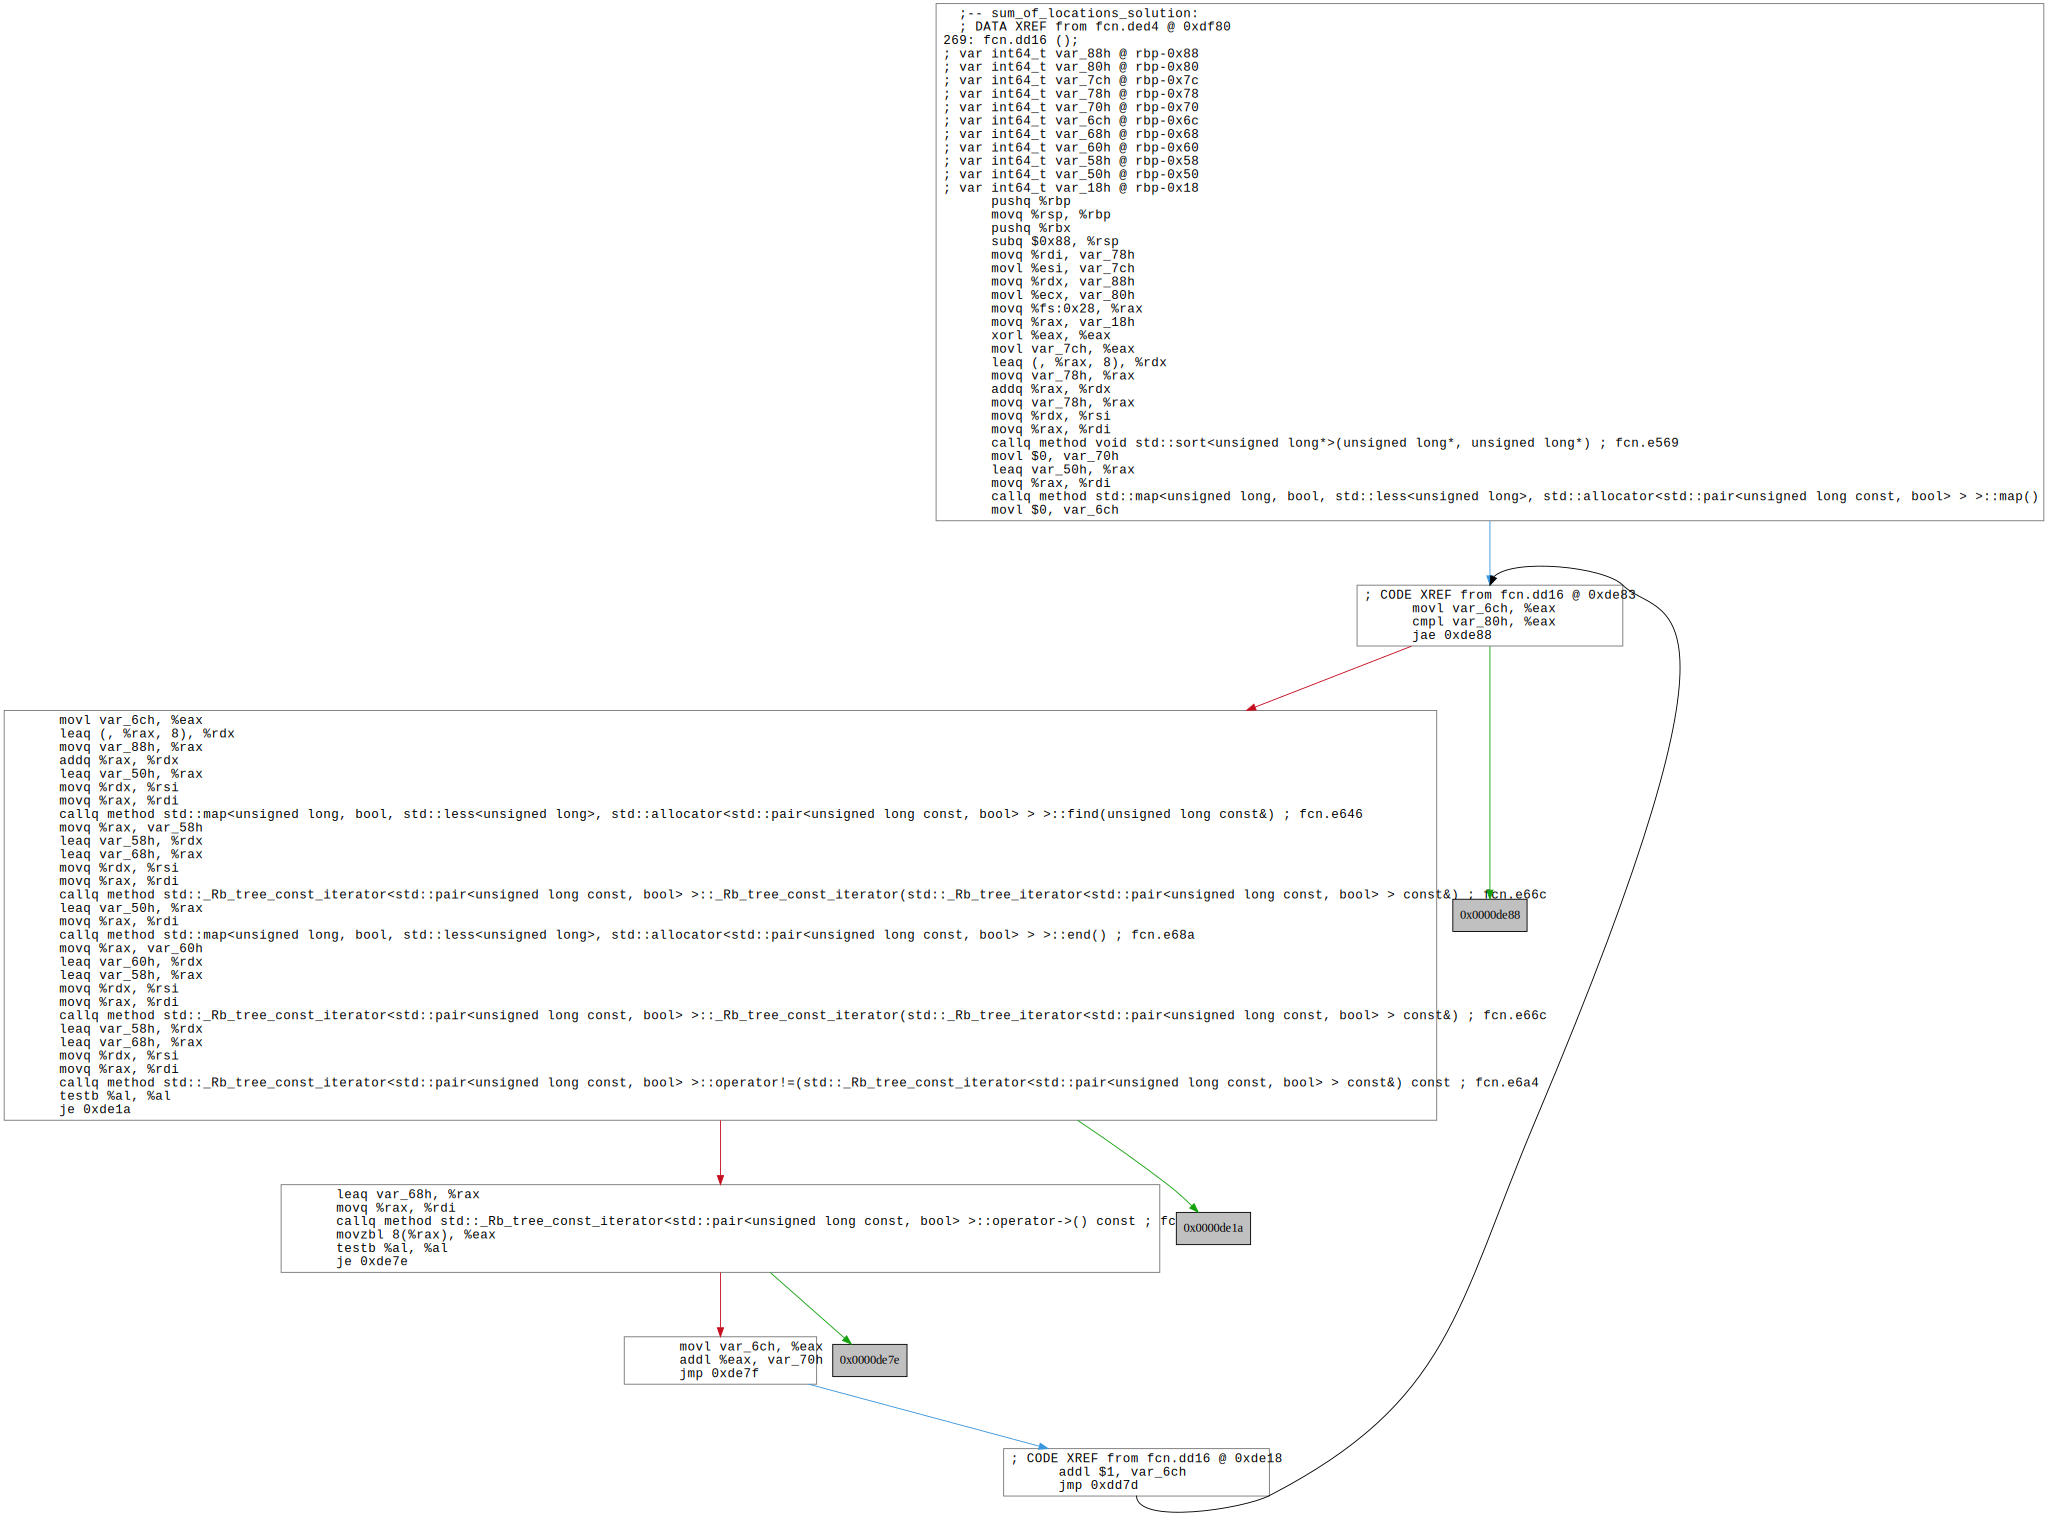

In [249]:
f = fiddle("sum.cpp", function="sum_of_locations_solution", build_cmd="make sum.exe build/sum.s", run=False, gprof=False, trim_addresses=True)
# display(f.asm) # uncomment to display the assembly.
display(f.cfg) # uncomment to display the cfg
# display(f.source) # uncomment to display the source


## Analyzing Your Implementation

Complete these questions after you've completed your solution to programming assignment.

To achieve a good speedup on this lab you needed to apply both compiler optimizations and algorithm changes.  
Optimizations can interact with each other in surprising ways. 
Let's see how each contributed to the overall speedup.

(The cell below should contain the code for your `sum_of_locations_solution()`, and the TAs will refer to it while grading.  If your code isn't showing up here, rerun the cell.  If it still doesn't show up, add a text cell and paste in your function.)

In [339]:

render_code("sum.cpp", show="sum_of_locations_solution")
render_code("config.make")

// sum.cpp:37-54 (18 lines)
uint64_t sum_of_locations_solution(uint64_t *search_space, uint32_t search_space_size, uint64_t* queries, uint32_t query_count)
{
        std::sort(search_space, &search_space[search_space_size]);
        uint32_t r = 0;
        for(uint32_t i = 0; i < query_count; i++) {

            if( queries[i] < search_space[0] ){      
                continue;
            }
            if( queries[i] > search_space[search_space_size - 1] ){
                continue;
            }
            if(binarySearh(queries[i],search_space, 0 , search_space_size-1)){
                r += i;
            }
        }
	return r;
}

// config.make:1-3 (3 lines)
SUM_OPTIMIZE=

The rest of the lab is about measuring the contribution of compiler optimizations vs algorithmic optimizations.  The result of the your investigation will go into the question below.

The first step is to collect the data.  

The cell below will run four different versions of the experiment:

1.  The `sum_of_locations` with compiler optimizations.
2.  The `sum_of_locations` without compiler optimizations.
3.  The `sum_of_locations_solution` with compiler optimizations.
4.  The `sum_of_locations_solution` without compiler optimizations.

It uses tags to differentiate between the optimized and un-optimized versions.

In [294]:
!make clean;
!make sum.exe
!cse142 job run  --lab compiler "./sum.exe  --MHz 3500 --function sum_of_locations sum_of_locations_solution --stats opt.csv --stat-set PE.cfg --tag opt=opt"
!make clean;
# This overrides config.make and forces no optimizations.
!make sum.exe SUM_OPTIMIZE=
!cse142 job run  --lab compiler "./sum.exe  --MHz 3500 --function sum_of_locations sum_of_locations_solution --stats noopt.csv --stat-set PE.cfg --tag opt=no-opt"

rm -rf build/ .tmp
rm -rf *.gv *-gv.pdf *.pin-trace #*.csv 
rm -rf *.exe *.o *.i *.s *.out *.d *.gcda *.gcno *.gprof *.gcov *.csv.raw core	
rm -rf 
mkdir -p build/
cp sum.cpp build/sum.cpp 
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/sum.cpp -o build/sum.o
mkdir -p build/
cp sum_main.cpp build/sum_main.cpp 
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse141pp-archlab -I/usr/local/include -I/usr/local/include -I/cse142L/CSE141pp-SimpleCNN  -Ibuild/  -I/cse142L/CSE141pp-Tool-Moneta/moneta/  -I. -MMD  -std=gnu++11   build/sum_main.cpp -o build/sum_main.o
mkdir -p build/
cp sum_baseline.cpp build/sum_baseline.cpp 
gcc-8 -c -Wall -Werror -g    -fPIC -pthread     -I/cse142L/cse141pp-archlab/libarchlab -I/cse142L/cse1

Now you need to create a data frame that contains the results the experiment in form that we can plot.  In particular you need to:

1. Open the `csv` file created by the command above and load them into two dataframes.
2. Combine them into one data frame
3. Compute a new column that has "function name-optimization level" in it (e.g., `sum_of_locations-noopt`).
4. Compute the speedup of all four implementations relative to `sum_of_location-noopt`.
5. Plot the resulting graph.

There are examples of the tools you'll need for this in the "Useful Tools" section above.
    
**You must show your work.**  In the cell below, put the your code to do all of the above.

The resulting dataframe should look like this (but with data in it):


| workload | ET | Speedup | 
| ------------|----|---------|
| sum_of_locations-noopt  | 9.38257384300232   |    1     |
| sum_of_locations-opt  |   1.8788702487945557 |     0.2    |
| sum_of_locations_solution-noopt   |  9.38257384300232  |    1     |
| sum_of_locations_solution-opt  |  1.8788702487945557  |     0.2    |

**Note:**. You should _not_ fill in the table above.  You need use `display()` show your final data frame.

<div class="question correctness points-8">

<div class="question-text">
Put your code to prepare the dataframe in the cell below.  The last two lines should render your dataframe and plot `ET` as a bar graph.  (You are allowed to hard-code numbers from your results into your code to compute speedup)
    </div>

</div>

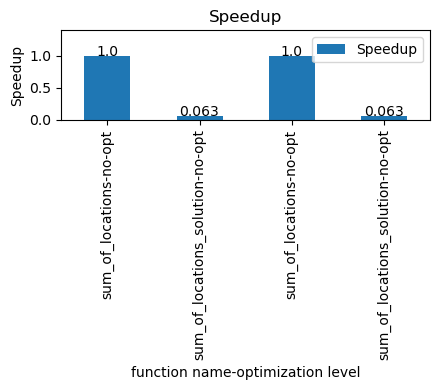

In [295]:
df = render_csv("noopt.csv")
vale1 = df['ET'][0]
df2 = render_csv("noopt.csv.raw")
both = df.append(df2)
both["function name-optimization level"] = both["function"] + "-" + both["opt"]
both["Speedup"] = both['ET']/vale1
plotPEBar(df=both, what=[("function name-optimization level", "Speedup")])






<div class="question correctness points-4">

<div class="question-text">

Based on you data, did the compiler optimizations provide more speedup on `sum_of_locations()` or `sum_of_locations_solution()`?  
    
Likewise, did algorithmic improvements provide more or less speedup with compiler optimizations enabled than with them disabled?

</div>

<div class="answer">
    Base on the data, they have no difference. Algorithmic provide the same speedup with complier optimizations
</div>
</div>

<div class="question optional">

<div class="question-text">
    
Modify your dataframe manipulation code above to figure to not require hard-coding values for the speedup computation.

</div>

</div>

## Final Measurement

When you are done, make sure your best solution is named `sum_of_locations_solution()` in `sum.cpp`.  Then you can submit your code to the Gradescope autograder.  It will run the command given above and use the `ET` and `result` values from `autograde.csv` to assign your grade.

Your grade is based on your speed up relative to the original version of `sum_of_locations()`.  The target speedup is 35x.  So your score is `your_speedup/35 * 100.0`.  To get points, your code must also be correct.  The autograder will run some tests on your code against random inputs to check it's correctness.

You can mimic exactly what the autograder will do with the command below.

After you run it, the results will be in `autograde/autogradecsv` rather than `./benchmark.csv`.  This command builds and runs your code in a more controlled way by doing the following:

1.  Ignores all the files in your repo except `sum.cpp` and `config.make`.
2.  Copies those files into a clean clone of the starter repo.
3.  Builds `sum.exe` from scratch.
4.  And then runs the command above with `--function sum_of_locations_solution sum_of_location`.
5.  It then runs the `autograde.py` script to compute your grade.

In [ ]:
!cse142 job run --take sum.cpp --take PE.cfg --take config.make --lab compiler-bench --force  autograde
!./autograde.py --submission autograde --results autograde.json

You are submitting a job for lab "Lab 2: The Compiler (Benchmark)" (compiler-bench).
The due date for Lab 2: The Compiler (Benchmark) has passed.  You can still submit, but you might want to submit for the current lab since the target docker image may be different, and things may not behave as described in the lab writeup.
You are running a autograde job.  Here's what will get run:
  git clone --branch main https://github.com/CSE142/fa21-CSE142L-compiler-starter.git autograde
  make -C autograde copy-files LAB_SUBMISSION_DIR=. autograde
The outputs will appear in the 'autograde' directory.  Check STUDENT_EDITABLE_FILES in Makefile to see what source files will be copied over.
Creating job 4dda4c74-4ff1-4821-b2ea-ef22784185a5 0.00 0.00
Ready for submission. 2.23 2.23
Job 4dda4c74-4ff1-4821-b2ea-ef22784185a5 is in state 'PUBLISHED'. 1.41 3.65 
Job 4dda4c74-4ff1-4821-b2ea-ef22784185a5 is in state 'RUNNING'. 1.04 4.69...........

You can check the performance results like this:

In [320]:
display(render_csv("autograde/autograde.csv"))

space_size  query_count  seed  result  cmdlineMHz  \
0     2097152         1024     1  256702        3500   
1     2097152         1024     1  256702        3500   

                    function  rep         ET    speedup  Unnamed: 9  
0  sum_of_locations_solution    0   0.555495  13.897521         NaN  
1           sum_of_locations    0  11.770087   0.655900         NaN

And see the autograder's output like this:

In [298]:
render_code("autograde.json")

// autograde.json:1-29 (29 lines)
{
    "output": "The autograder ran.",
    "visibility": "visible",
    "stdout_visibility": "visible",
    "tests": [
        {
            "score": 1,
            "max_score": 1,
            "number": "1",
            "output": "tests passed",
            "tags": [],
            "visibility": "visible"
        },
        {
            "score": 41.34,
            "max_score": 100,
            "number": "2",
            "output": "Your speedup is 14.47x.  The target speedup is 35.0x. Your score is 14.47/35.0*100 = 41.34",
            "tags": [],
            "visibility": "visible"
        }
    ],
    "leaderboard": [
        {
            "name": "speedup",
            "value": 14.47
        }
    ]
}

Most of it is internal stuff that gradscope needs, but the key parts are the `score`, `max_score`, and `output` fields.

All that's left is commit your code:

In [299]:
!git commit -am "Solution to the lab."
!git push

[main b7a6005] Solution to the lab.
 2 files changed, 999 insertions(+), 694 deletions(-)
Counting objects: 4, done.
Delta compression using up to 40 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 94.96 KiB | 790.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:CSE142/su22-cse142l-compiler-JiamingLiu0811.git
   8d8bb87..b7a6005  main -> main


If `git commit` tell you something like:

```
*** Please tell me who you are.

Run

git config --global user.email "you@example.com"
git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'prcheng@dsmlp-jupyter-prcheng.(none)')
Warning: Permanently added the RSA host key for IP address '140.82.112.3' to the list of known hosts.
Everything up-to-date
```

Then you can do (but fill in your @ucsd.edu email and your name):

In [300]:

!git config --global user.email "jil244@ucsd.edu"
!git config --global user.name "Jiaming Liu"

<div class="alert alert-block alert-danger">

**Subverting the autograder is an AI violation** The autograder constrains how your code is run.  It's not perfect, and there are probably ways to "hack" it give you more points than your solution deserves.  Attempting to do so is an AI violation and will be treated accordingly.
    
</div>

# Recap

This lab has illustrated a range of common compiler optimizations that improve program performance.  We've seen how optimizations can work in isolation and, often more important, how one optimization (I'm looking at you, inlining) can often unlock additional opportunities to apply further optimizations.  We've also seen how optimizations are especially important for C++ and other languages where small functions are common.  Finally, we quantified the impact of optimizations using the performance equation.

<div class="question optional">

<div class="question-text">

What's something interesting or surprising you found in this lab by experiment with code in a `fiddle`?  Paste the fiddle below and run it before you turn in your lab.
    
</div>
    
</div>

In [ ]:

# Your crazy fiddle here

# Turning In the Lab

For each lab, there are two different assignments on gradescope:

1.  The lab notebook.
2.  The programming assignment.

There's also a pre-lab reading quiz on Canvas and a post-lab survey which is embedded below.

## Reading Quiz

The reading quiz is an online assignment on Canvas.  It's due before the class when we will assign the lab.

## The Note Book

You need to turn in your lab notebook and your programming assignment separately. 

After you complete the lab, you will turn it in by creating a version of the notebook that only contains your answers and then printing that to a pdf.

**Step 1:**  Save your workbook!!!

In [303]:
!for i in 1 2 3 4 5; do echo Save your notebook!; sleep 1; done

Save your notebook!
Save your notebook!
Save your notebook!
Save your notebook!
Save your notebook!


**Step 2:**  Run this command:

In [304]:
!turnin-lab Lab.ipynb
!ls -lh Lab.turnin.ipynb

Wrote to Lab.turnin.ipynb
-rw-r--r-- 1 jil244 root 445K Aug 12 18:51 Lab.turnin.ipynb


The date in the above file listing should show that you just created `Lab.turnin.ipynb`

**Step 3:**  Click on this link to open it: [./Lab.turnin.ipynb](./Lab.turnin.ipynb)

**Step 4:**  Hide the table of contents by clicking the

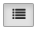

**Step 5:**  Select "Print" from _your browser's_ "file" menu.  Print directly to a PDF.

**Step 6:**  Make sure all your answers are visible and not cut off the side of the page.

**Step 7:**  Turn in that PDF via gradescope.

<div class="alert alert-block alert-danger">

**Print Carefully** It's important that you print directly to a PDF.  In particular, you should _not_ do any of the following:
    
1. **Do not** select "Print Preview" and then print that. (Remarkably, this is not the same as printing directly, so it's not clear what it is a preview of)
2. **Do not** select `Download as-> PDF via LaTex.  It generates nothing useful.
    
</div>

In gradescope, you'll need to show us where all your answers are.  Please do this carefully, if we can't find your answer, we can't grade it.

## The Programming Assignment

You'll turn in your programming assignment by providing gradescope with your github repo.   It'll run the autograder and return the results.

## Lab Survey

Please fill out this survey when you've finished the lab.  You can only submit once.  Be sure to press "submit", your answers won't be saved in the notebook.

In [340]:
from IPython.display import IFrame    
IFrame('https://docs.google.com/forms/d/1xIYT16NuMV_ocYWY3ttDuoR01yt4if63mOviZRyAUXg/viewform?embedded=true', width=800, height=2000)
